<a href="https://colab.research.google.com/github/laghri/Python_Southern_Water_Corp_Case_Study_BBDS/blob/main/Python_Southern_Water_Corp_Case_Study_BBDS_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src= 'http://www.bigbang-datascience.com/wp-content/uploads/2017/09/cropped-Logo-01.jpg' width=500/>

### Welcome to the Southern Water Corp Python Case Study!

While working on the Financial unit, you used Microsoft Excel's data analytics capabilities to analyze Southern Water Corp's data.

Now, Joanna Luez — Southern Water Corp's Lead Scientist — has requested that you convert your earlier analysis in Excel to Python Code. After all, with all the formulas in Excel, it can be tricky for others with less experience in Excel to follow.

Excel is an excellent tool for adhoc analysis, but Python is an invaluable tool thanks to its advanced data analysis capabilities that only take a few lines of code to complete.

**Please note that this case study is composed of two parts** — once you have completed part 1, which involves descriptive statistics, please submit your work and discuss it with your mentor before moving on to part 2.

### Let's get started!

---

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span>

Import the libraries you'll need for your analysis. You will need the following libraries:

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study so we encourage you to important these two specific libraries with their own aliases. Also, include the line **'%matplotlib inline'** so that your graphs are easily included in your notebook. You will need to import DateFormatter from matplotlib as well.

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodel.api** - This library will enable you to create statistical models. You will need this library when perfroming regession analysis in Part 2 of this case study.

## Place your code here

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
#Mthode SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

%matplotlib inline




---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span>
Unfortunately, the data you've received from Southern Water Corp has been split into three files: Desalination_Unit_File 001, Desalination_Unit_File_002, and Desalination_Unit_File_003. You'll need to merge them into a complete dataframe for your analysis. To do this, follow the steps below:

i. Import each of the three separate files and merge them into one dataframe.  Suggested names: **(dataframe_1, dataframe_2, dataframe_3)**. Don't forget to use the **header** argument to ensure your columns have meaningful names!

ii. Print descriptive statistics on your combined dataframe using **.describe()** and **.info()**

iii. Set "TIMEFRAME" as the index on your combined dataframe.

In [ ]:
dataframe_1=pd.read_csv('/content/Desalination_Unit_File_001.csv',header=0);
dataframe_2=pd.read_csv('/content/Desalination_Unit_File_002.csv',header=0);
dataframe_3=pd.read_csv('/content/Desalination_Unit_File_003.csv',header=0);

In [ ]:
dataframe_3.head()

,m3/d,m3/d.1,rpm,Newton Meters,Newton Meters.1,m3/d.2,psi,%,Unnamed: 8,Unnamed: 9
0,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,PUMP FAILURE (1 or 0),TIMEFRAME
1,0.098897468,0.064231587,-1,-2.241679722,-2.085571603,0,377.1662791,0,0,10/12/2014 8:34:00
2,0.100091133,0.064496567,-1,-2.239189487,-2.083437146,0,375.3662,0,0,10/12/2014 8:36:00
3,0.100342175,0.064552295,-1,-2.238665761,-2.082988245,0,375.3662,0,0,10/12/2014 8:37:00
4,0.101764691,0.064868077,-1,-2.235698098,-2.08044457,0,375.3662,0,0,10/12/2014 8:39:00


---------------------------------------------------------------------------

In [ ]:
df = pd.concat([dataframe_1, dataframe_2, dataframe_3], ignore_index=True)
df2=pd.concat([dataframe_1, dataframe_2, dataframe_3], ignore_index=True)
df3=pd.concat([dataframe_1, dataframe_2, dataframe_3], ignore_index=True)
# Step 2: Print descriptive statistics and information
print(df.describe())
print(df.info())

# Step 3: Set "TIMEFRAME" as the index

df.columns=df.iloc[0]
df3.columns=df.iloc[0]

df2.columns=df2.iloc[0]
print(df.columns)
df.set_index("TIMEFRAME", inplace=True)
df=df[1:]
df2=df2[1:]
df3=df3[1:]

        m3/d     m3/d.1   rpm Newton Meters Newton Meters.1 m3/d.2       psi  \
count   7001       7001  7001          7001            7001   7001      7001   
unique  6585       5251  2086          6431            2578      2      3206   
top        0  -9.008789     0             0        285.4934      0  382.6904   
freq     414        219  2524           413            2489   6998       725   

           % Unnamed: 8           Unnamed: 9  
count   7001       7000                 7001  
unique  3459          3                 1571  
top        0          0  10/12/2014 14:41:00  
freq    2848       6932                   36  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   m3/d             7001 non-null   object
 1   m3/d.1           7001 non-null   object
 2   rpm              7001 non-null   object
 3   Newton Meters    7001 non

In [ ]:
df.head()

,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,PUMP FAILURE (1 or 0)
TIMEFRAME,,,,,,,,,
09/12/2014 0:00,0,-4.768066,0,0,0,0,0,0,0
09/12/2014 0:01,0,-4.855957,0,0,0,0,0,0,0
09/12/2014 0:01,0,-7.447938449,0,0,0,0,378.1128,0,0
09/12/2014 0:01,0,-8.745117,0,0,0,0,379.0283,0,0
09/12/2014 0:02,0,-6.877441,0,0,0,0,378.9599188,0,0


In [ ]:
df2.head()

,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,PUMP FAILURE (1 or 0),TIMEFRAME
1,0,-4.768066,0,0,0,0,0,0,0,09/12/2014 0:00
2,0,-4.855957,0,0,0,0,0,0,0,09/12/2014 0:01
3,0,-7.447938449,0,0,0,0,378.1128,0,0,09/12/2014 0:01
4,0,-8.745117,0,0,0,0,379.0283,0,0,09/12/2014 0:01
5,0,-6.877441,0,0,0,0,378.9599188,0,0,09/12/2014 0:02


In [ ]:
index=[]
for i in range(1,len(df2['PUMP FAILURE (1 or 0)'])):
 if df2['PUMP FAILURE (1 or 0)'][i]=='PUMP FAILURE (1 or 0)':
    index.append(i)
df2 = df2.drop(index)


In [ ]:
df2['TIMEFRAME'] = pd.to_datetime(df2['TIMEFRAME'])

# Extract year, month, day, hour, etc. into separate columns
df2['Year'] = df2['TIMEFRAME'].dt.year
df2['Month'] = df2['TIMEFRAME'].dt.month
df2['Day'] = df2['TIMEFRAME'].dt.day
df2['Hour'] = df2['TIMEFRAME'].dt.hour
df2['minute'] = df2['TIMEFRAME'].dt.minute
df2 = df2.drop('TIMEFRAME', axis=1)
df2 = df2.dropna(subset=['Year','Month','Day','Hour','minute'])

In [ ]:
df2.head()

,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,PUMP FAILURE (1 or 0),Year,Month,Day,Hour,minute
1,0,-4.768066,0,0,0,0,0,0,0,2014.0,9.0,12.0,0.0,0.0
2,0,-4.855957,0,0,0,0,0,0,0,2014.0,9.0,12.0,0.0,1.0
3,0,-7.447938449,0,0,0,0,378.1128,0,0,2014.0,9.0,12.0,0.0,1.0
4,0,-8.745117,0,0,0,0,379.0283,0,0,2014.0,9.0,12.0,0.0,1.0
5,0,-6.877441,0,0,0,0,378.9599188,0,0,2014.0,9.0,12.0,0.0,2.0


In [ ]:
column_before = df2.iloc[:, -6].copy()
df2.iloc[:, -6] = df2.iloc[:, -1]
df2.iloc[:, -1] = column_before
df2 = df2.rename(columns={'minute': 'PUMP FAILURE (1 or 0)', 'PUMP FAILURE (1 or 0)': 'minute'})

<ipython-input-12-5ff2c4b89fc9>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.iloc[:, -6] = df2.iloc[:, -1]


In [ ]:
df2.columns

Index(['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'minute', 'Year', 'Month', 'Day', 'Hour',
       'PUMP FAILURE (1 or 0)'],
      dtype='object', name=0)

In [ ]:
df2.head()

,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,minute,Year,Month,Day,Hour,PUMP FAILURE (1 or 0)
1,0,-4.768066,0,0,0,0,0,0,0.0,2014.0,9.0,12.0,0.0,0
2,0,-4.855957,0,0,0,0,0,0,1.0,2014.0,9.0,12.0,0.0,0
3,0,-7.447938449,0,0,0,0,378.1128,0,1.0,2014.0,9.0,12.0,0.0,0
4,0,-8.745117,0,0,0,0,379.0283,0,1.0,2014.0,9.0,12.0,0.0,0
5,0,-6.877441,0,0,0,0,378.9599188,0,2.0,2014.0,9.0,12.0,0.0,0


In [ ]:
df2['PUMP FAILURE (1 or 0)'].unique()

array(['0', nan, '1'], dtype=object)

##Balance the data by using the methode SMOTE

In [ ]:
df2['minute'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 39., 40., 41., 42., 43.,
       44., 45., 46., 49., 51., 52., 53., 54., 55., 56., 57., 58., 59.,
        6., 24., 37., 38., 47., 48., 50.,  7.])

In [ ]:
df2.head()

,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,minute,Year,Month,Day,Hour,PUMP FAILURE (1 or 0)
1,0,-4.768066,0,0,0,0,0,0,0.0,2014.0,9.0,12.0,0.0,0
2,0,-4.855957,0,0,0,0,0,0,1.0,2014.0,9.0,12.0,0.0,0
3,0,-7.447938449,0,0,0,0,378.1128,0,1.0,2014.0,9.0,12.0,0.0,0
4,0,-8.745117,0,0,0,0,379.0283,0,1.0,2014.0,9.0,12.0,0.0,0
5,0,-6.877441,0,0,0,0,378.9599188,0,2.0,2014.0,9.0,12.0,0.0,0


In [ ]:
# Convert data types if needed
df2 = df2.dropna(subset=['PUMP FAILURE (1 or 0)'])

df2['PUMP FAILURE (1 or 0)'] = df2['PUMP FAILURE (1 or 0)'].astype(int)

# Split the data into X (features) and y (target variable)
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

# Define the oversampler and undersampler
oversampler = SMOTE()
undersampler = RandomUnderSampler()

# Create a pipeline to combine oversampling and undersampling
pipeline = make_pipeline(oversampler, undersampler)

# Resample the data
X_resampled, y_resampled = pipeline.fit_resample(X, y)


<ipython-input-18-160df17640fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PUMP FAILURE (1 or 0)'] = df2['PUMP FAILURE (1 or 0)'].astype(int)


In [ ]:
y_resampled.value_counts()


0    6932
1    6932
Name: PUMP FAILURE (1 or 0), dtype: int64

In [ ]:
df2.shape

(6997, 14)

In [ ]:
X_resampled = np.array(X_resampled)
y_resampled = np.array(y_resampled).reshape(-1, 1)  # Reshape y_resampled to have 2D shape

# Combine X_resampled and y_resampled into a single array/list
data = np.concatenate((X_resampled, y_resampled), axis=1)

# Create DataFrame from the combined data
column_names = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'minute', 'Year', 'Month', 'Day', 'Hour',
       'PUMP FAILURE (1 or 0)']
df2 = pd.DataFrame(data)

In [ ]:
df2 .columns=column_names

In [ ]:
df2.head()

,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,minute,Year,Month,Day,Hour,PUMP FAILURE (1 or 0)
0,0.0,-4.768066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,9.0,12.0,0.0,0
1,0.0,-4.855957,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2014.0,9.0,12.0,0.0,0
2,0.0,-7.447938,0.0,0.0,0.0,0.0,378.1128,0.0,1.0,2014.0,9.0,12.0,0.0,0
3,0.0,-8.745117,0.0,0.0,0.0,0.0,379.0283,0.0,1.0,2014.0,9.0,12.0,0.0,0
4,0.0,-6.877441,0.0,0.0,0.0,0.0,378.959919,0.0,2.0,2014.0,9.0,12.0,0.0,0


In [ ]:
# # Convert columns to numeric types
# time=df['TIMEFRAME'];
# data = pd.Series([
#   time
# ])
# data = pd.to_datetime(data, format='%d/%m/%Y %H:%M:%S')

# # Convert datetime to timestamp
# data = data.astype('int64') // 10**9
# # df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
df3.dropna(inplace=True)

In [ ]:
#df = df.astype(float)
for name in df3.columns:
  if name!='TIMEFRAME':
    df3[name] = df3[name].apply(pd.to_numeric, errors='coerce')

    df[name] = df[name].apply(pd.to_numeric, errors='coerce')


df.fillna(round(df.mean()))

df2.apply(pd.to_numeric, errors='coerce')

,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,minute,Year,Month,Day,Hour,PUMP FAILURE (1 or 0)
0,0.000000,-4.768066,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2014.0,9.0,12.0,0.0,0
1,0.000000,-4.855957,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,2014.0,9.0,12.0,0.0,0
2,0.000000,-7.447938,0.000000,0.000000,0.000000,0.0,378.112800,0.000000,1.000000,2014.0,9.0,12.0,0.0,0
3,0.000000,-8.745117,0.000000,0.000000,0.000000,0.0,379.028300,0.000000,1.000000,2014.0,9.0,12.0,0.0,0
4,0.000000,-6.877441,0.000000,0.000000,0.000000,0.0,378.959919,0.000000,2.000000,2014.0,9.0,12.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13859,106.820276,18.077955,95.405702,690.889959,1032.197011,0.0,381.036055,0.858501,41.000000,2014.0,10.0,12.0,14.0,1
13860,111.885228,13.620259,99.000000,713.658006,898.026675,0.0,381.315502,0.863942,40.183212,2014.0,10.0,12.0,14.0,1
13861,102.378791,295.183237,90.068720,376.805986,1141.430754,0.0,381.384455,0.839617,41.000000,2014.0,10.0,12.0,14.0,1
13862,104.864085,79.379217,92.778574,675.201863,1083.136635,0.0,381.207555,0.804828,41.000000,2014.0,10.0,12.0,14.0,1


### Step 3: <span style="color:green">Create a Boxplot</span>

When you look at your dataframe, you should now be able to see the upper and lower quartiles for each row of data. You should now also have a rough sense of the number of entires in each dataset. However, just as you learned when using Excel, creating a visualization of the data using Python is often more informative than viewing the table statistics. Next up — convert the tables you created into a boxplot by following these instructions:

i) Create a boxplot from your combined dataframe using **matplotlib and seaborn** with all the variables plotted out. Note: do any particular variables stand out to you? Title your visualization **"Boxplot for all attributes"** and set the boxplot size to 25 x 5.

### Please put your code here


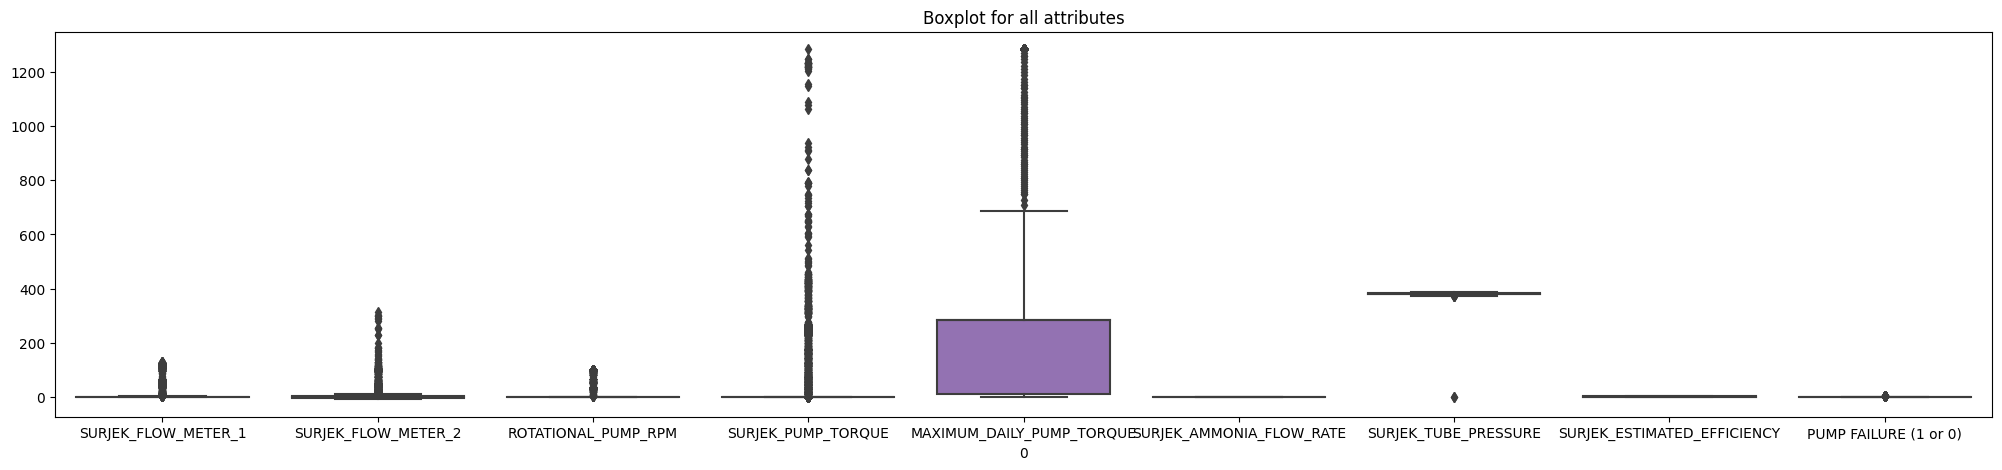

In [ ]:
# Create the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=df)
plt.title('Boxplot for all attributes')
plt.show()


#### You would probably note that it might seem that some variables, due to their range and size of values, dwarfs some of the other variables which makes the variation difficult to see.


#### Perhaps, we should remove these variables and look at the box plot again?

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Create a Filtered Boxplot</span>
i) Create the same boxplot from  <span style="color:green">Step 3</span>, but this time, filter out SURJEK_PUMP_TORQUE and MAXIMUM_DAILY_PUMP_TORQUE. Create a new dataframe and apply a filter named **'dataframe_filt'**. Title this boxplot 'Boxplot without Pump Torque, or Max Daily Pump Torque'.  We have provided the filter list for you.

**Open-ended question:**

Beyond pump torque and max daily pump torque, do any other attributes seem to 'stand out'?

## Please put your code here

In [ ]:
df.head()

,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,PUMP FAILURE (1 or 0)
TIMEFRAME,,,,,,,,,
09/12/2014 0:00,0.0,-4.768066,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
09/12/2014 0:01,0.0,-4.855957,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
09/12/2014 0:01,0.0,-7.447938,0.0,0.0,0.0,0.0,378.112800,0.0,0.0
09/12/2014 0:01,0.0,-8.745117,0.0,0.0,0.0,0.0,379.028300,0.0,0.0
09/12/2014 0:02,0.0,-6.877441,0.0,0.0,0.0,0.0,378.959919,0.0,0.0


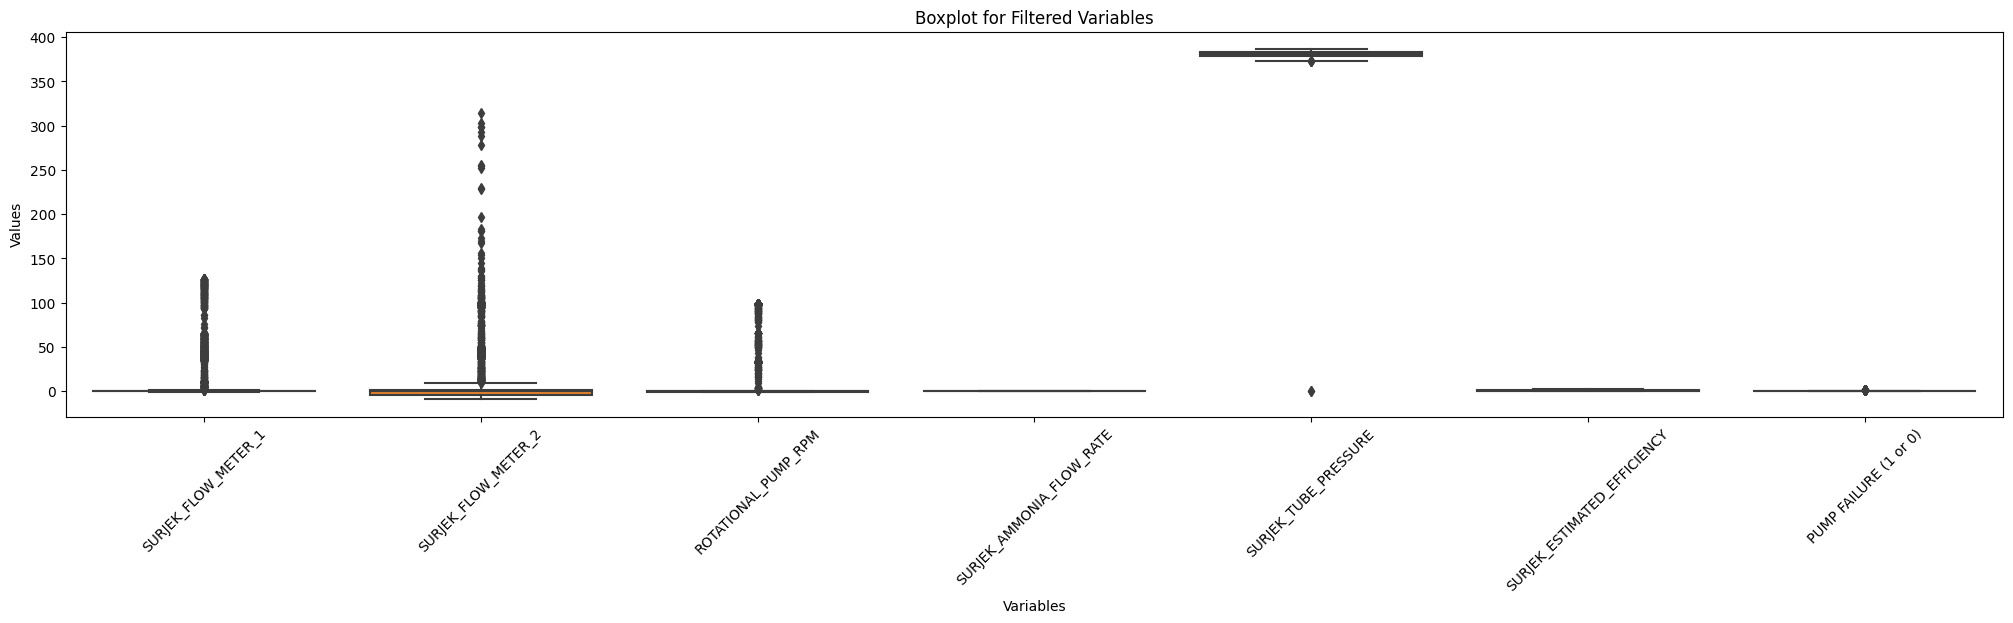

In [ ]:
#Below is the first part of the code
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']
df_filtered = df[filt]

# Create the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=df_filtered)
plt.title('Boxplot for Filtered Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


---------------------------------------------------------------------------

### Step 5: <span style="color:green">Filter Your Boxplot by Column Value</span>

i) Using the whole dataset, create another boxplot using the whole dataset but this time, compare the distributions for when Pump Failure is 1 (The Pump has failed) and 0 (Pump is in normal operations). You will be creating two boxplots using the 'PUMP FAILURE (1 or 0)' column in the dataset. We have provided a few lines of code to get you started. Once complete, you should be able to see how much quicker it is to apply filters in Python than it is in Excel.

Note: Please display the two boxplots side-by-side. You can do this by creating a shared X axis or by creating two axes and looping through them while using the pyplot command.

**Open-ended Question:**

What variables seem to have the largest variation when the Pump has failed?


## Please put your code here

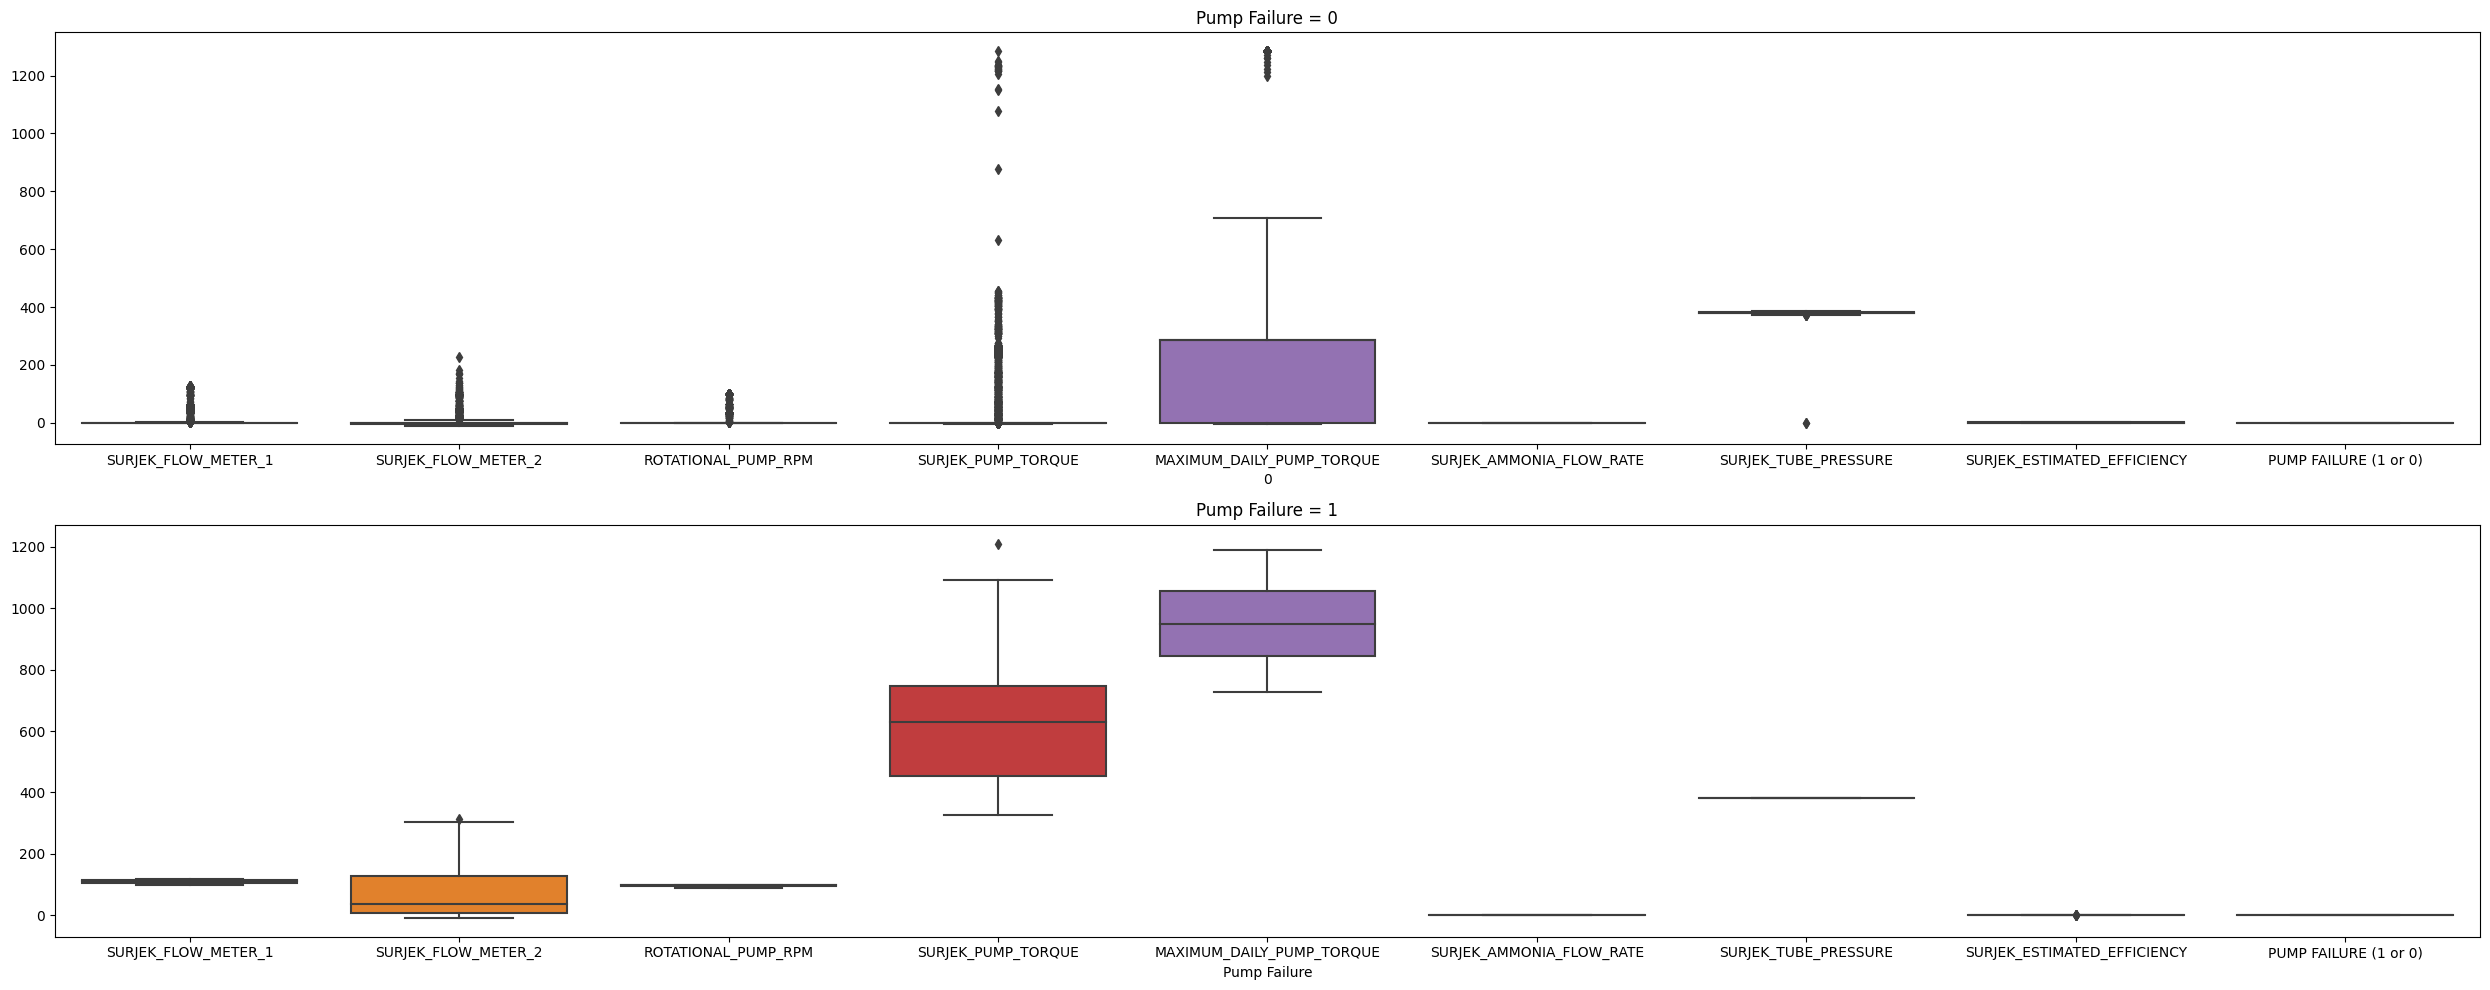

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(25, 10))

# Boxplot for Pump Failure = 0
sns.boxplot(data=df[df['PUMP FAILURE (1 or 0)'] == 0], ax=axes[0])
axes[0].set_title('Pump Failure = 0')

# Boxplot for Pump Failure = 1
sns.boxplot(data=df[df['PUMP FAILURE (1 or 0)'] == 1], ax=axes[1])
axes[1].set_title('Pump Failure = 1')

# Set labels and adjust layout
plt.xlabel('Pump Failure')
plt.tight_layout()
plt.show()

### From analysing the boxplots, you'll notice that there seem to be a number of outliers.
When you did this work in Excel, you used the interquartile ranges to remove the outliers from each column. Happily, Python allows you to do this same process more quickly and efficiently, as you'll see when working on  <span style="color:green">Step 6</span>.

In [ ]:
# Filter the dataset for Pump Failure = 1
df_failed = df[df['PUMP FAILURE (1 or 0)'] == 1]

# Calculate the standard deviation for each variable
std_dev = df_failed.std()

# Sort the variables based on the standard deviation in descending order
sorted_vars = std_dev.sort_values(ascending=False)

# Print the variables with the largest variation
print("Variables with the largest variation when the Pump has failed:")
print(sorted_vars)


Variables with the largest variation when the Pump has failed:
0
SURJEK_PUMP_TORQUE             205.065942
MAXIMUM_DAILY_PUMP_TORQUE      129.508982
SURJEK_FLOW_METER_2            101.854191
SURJEK_FLOW_METER_1              5.036621
ROTATIONAL_PUMP_RPM              3.523835
SURJEK_TUBE_PRESSURE             0.376825
SURJEK_ESTIMATED_EFFICIENCY      0.035729
SURJEK_AMMONIA_FLOW_RATE         0.000000
PUMP FAILURE (1 or 0)            0.000000
dtype: float64


---------------------------------------------------------------------------

### Step 6: <span style="color:green">Create Quartiles</span>

i) Create two new variables called Q1 and Q3. q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe.

ii) Calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

## Please put your code here

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

0
SURJEK_FLOW_METER_1              0.704162
SURJEK_FLOW_METER_2              5.748178
ROTATIONAL_PUMP_RPM              0.687240
SURJEK_PUMP_TORQUE               0.350032
MAXIMUM_DAILY_PUMP_TORQUE      276.315522
SURJEK_AMMONIA_FLOW_RATE         0.000000
SURJEK_TUBE_PRESSURE             3.662100
SURJEK_ESTIMATED_EFFICIENCY      1.240724
PUMP FAILURE (1 or 0)            0.000000
dtype: float64

---------------------------------------------------------------------------

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound


0
SURJEK_FLOW_METER_1             -1.056243
SURJEK_FLOW_METER_2            -13.388906
ROTATIONAL_PUMP_RPM             -1.718101
SURJEK_PUMP_TORQUE              -2.556042
MAXIMUM_DAILY_PUMP_TORQUE     -405.295405
SURJEK_AMMONIA_FLOW_RATE         0.000000
SURJEK_TUBE_PRESSURE           373.535150
SURJEK_ESTIMATED_EFFICIENCY     -1.861086
PUMP FAILURE (1 or 0)            0.000000
dtype: float64

### Step 7: <span style="color:green">Identify Outliers</span>

How many outliers do you have? What will happen to your dataset if you remove them all? Let's find out!

i) Calculate how many entries you currently have in the original dataframe.

ii) Using the quartiles and IQR previously calculated, identify the number of entries you'd have if you were to remove the outliers.

ii) Find the proportion of outliers that exist in the dataset.

Ensure your dataframe doesn't include the attribute TIMEFRAME - if it does, please drop this attribute for now.


## Please put your code here

In [ ]:
#Below is the first part of the code
#dataframe = pd.concat(combine)
#df = df.drop('TIMEFRAME', axis=0)
#---write your code below----------------
num_entries = df.shape[0] * df.shape[1]
# Assuming you have already calculated Q1, Q3, and IQR

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of entries after removing outliers
num_entries_without_outliers = ((df > lower_bound) & (df<upper_bound)).sum().sum()

#We have provided the print line, you need to provide the calculation after the quoted text:
print ("When we have not removed any outliers from the dataset, we have " + str(num_entries_without_outliers)  + " entries")

outliers = (df < lower_bound) | (df > upper_bound)
# Assuming you have already calculated lower_bound, upper_bound, and you have the original dataframe called 'df'

df_clean = df[(df >= lower_bound) & (df <= upper_bound)]

#We have provided the print line, you need to provide the calculation after the quoted text:
print ("When we have  removed any outliers from the dataset, we have " + str(df_clean.shape[0]) + " entries")
outliers = (df < lower_bound) | (df > upper_bound)
proportion_of_outliers = outliers.sum().sum() / df.size
print ("The proportion of outliers which exist when compared to the dataframe are: " +str(proportion_of_outliers))

When we have not removed any outliers from the dataset, we have 43199 entries
When we have  removed any outliers from the dataset, we have 12000 entries
The proportion of outliers which exist when compared to the dataframe are: 0.05418518518518518


---------------------------------------------------------------------------

### Step 8: <span style="color:green">Create a Boxplot without Outliers</span>

With the dataset now stripped of outliers, create the following boxplots:

i) A boxplot when PUMP FAILURE is 1

ii) A boxplot when PUMP FAILURE is 0

#### Note 1: Removing outliers is very situational and specific. Outliers can skew the dataset unfavourably; however, if you are doing a failure analysis, it is likely those outliers actually contain valuable insights you will want to keep as they represent a deviation from the norm that you'll need to understand.


#### Note 2: Please display the two boxplots side-by-side. You can do this by creating a shared X axis or by creating two axes and looping through them while using the pyplot command.


In [ ]:
df_clean['PUMP FAILURE (1 or 0)'].unique()
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!if we remove all the outliers our data become inbalance all pump failure equal 1 all of them removed

array([ 0., nan])

## Please put your code here

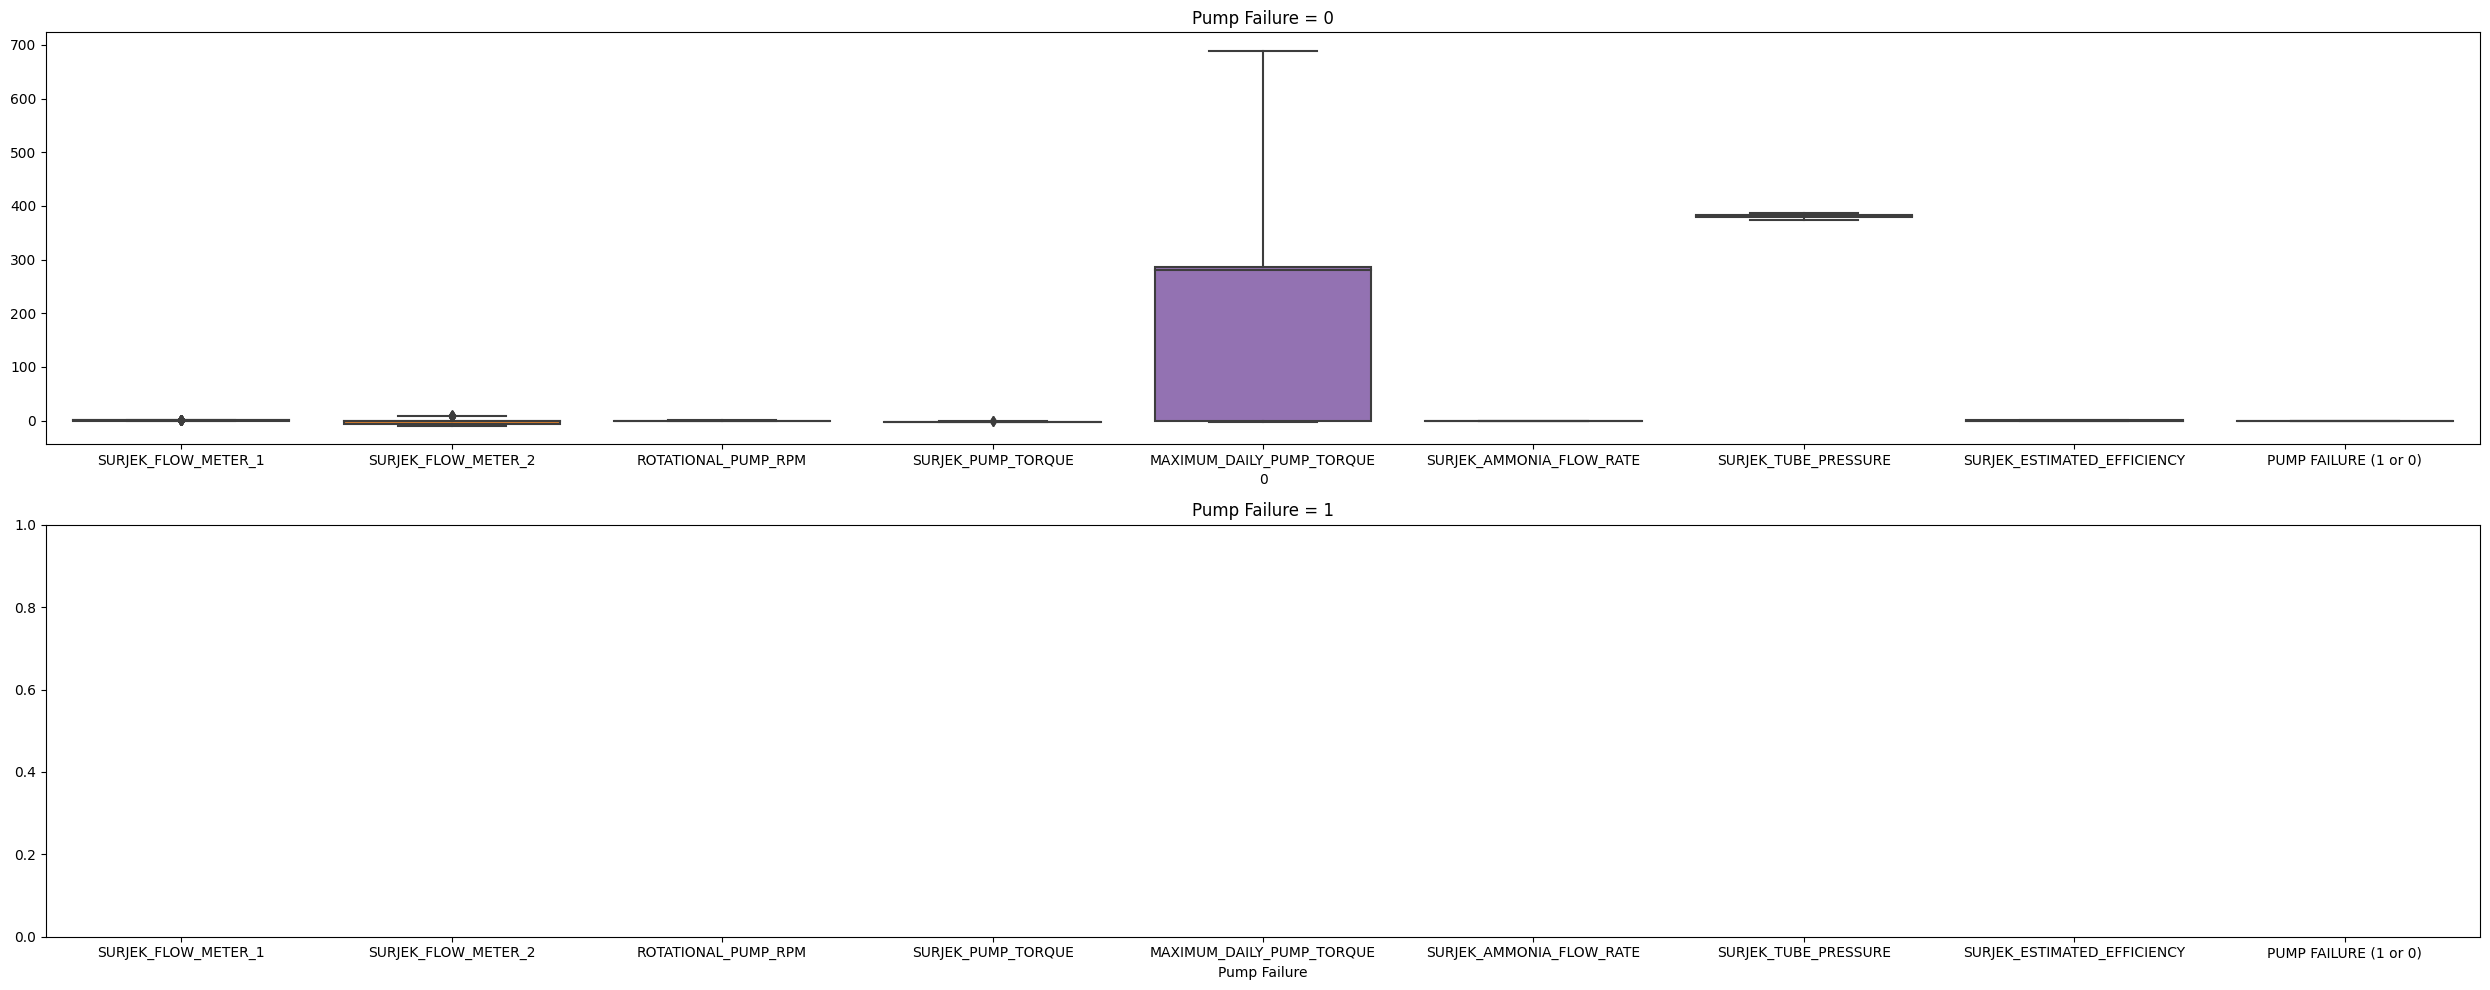

In [ ]:
# Assuming you have the cleaned dataframe without outliers called 'df_clean'

fig, axes = plt.subplots(2, 1, figsize=(25, 10))

# Boxplot for Pump Failure = 0
sns.boxplot(data=df_clean[df_clean['PUMP FAILURE (1 or 0)'] == 0], ax=axes[0])
axes[0].set_title('Pump Failure = 0')

# Boxplot for Pump Failure = 1
sns.boxplot(data=df_clean[df_clean['PUMP FAILURE (1 or 0)'] == 1], ax=axes[1])
axes[1].set_title('Pump Failure = 1')

# Set labels and adjust layout
plt.xlabel('Pump Failure')
plt.tight_layout()
plt.show()




### Based on the boxplots you've created, you've likely come to the conclusion that, for this case study, you actually _shouldn't_ remove the outliers, as you are attempting to understand the Pump Failure Behavior.

-----

### Step 9: <span style="color:green">Plot and Examine Each Column</span>
We have provided a filtered column list for you.

Using a loop, iterate through each of the Column Names and plot the data. (You can either make your X-axis the Timeframe variable or you can leave it blank and use the row numbers as an index).

Find the minimum (min) and maximum (max) time in the dataframe. Use Tight_layout. Include a title with min and max time.

**Note:** For each plot, ensure that you have a dual axis set up so you can see the Pump Behaviour (0 or 1) on the second Y-axis, and the attribute (e.g. SURJEK_FLOW_METER_1) on the first Y-Axis. It might be helpful to give the failureState it's own color and add a legend to the axis to make it easier to view.

Check out this link to learn how to do this: https://matplotlib.org/gallery/api/two_scales.html

##### Note: Please ensure that the dataframe you are plotting contains all the outliers and that the Pump Failure Behaviour includes both the 0 and 1 State.

In [ ]:
df2['TIMEFRAME'] = pd.to_datetime(df2['Year'].astype(int).astype(str) + '/' +
                                  df2['Month'].astype(int).astype(str) + '/' +
                                  df2['Day'].astype(int).astype(str) + ' ' +
                                  df2['Hour'].astype(int).astype(str) + ':' +
                                  df2['minute'].astype(int).astype(str))

# # Drop the individual columns
# df2 = df2.drop(['Year', 'Month', 'Day', 'Hour', 'minute'], axis=1)


In [ ]:
df2.head()

,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,minute,Year,Month,Day,Hour,PUMP FAILURE (1 or 0),TIMEFRAME
0,0.0,-4.768066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:00:00
1,0.0,-4.855957,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:01:00
2,0.0,-7.447938,0.0,0.0,0.0,0.0,378.1128,0.0,1.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:01:00
3,0.0,-8.745117,0.0,0.0,0.0,0.0,379.0283,0.0,1.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:01:00
4,0.0,-6.877441,0.0,0.0,0.0,0.0,378.959919,0.0,2.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:02:00


## Please put your code here

In [ ]:
# for i in range(1,len(df2['TIMEFRAME'])):
#    if str(df2['TIMEFRAME'][i])=='nan' or str(df2['TIMEFRAME'][i])=='TIMEFRAME':
#       df2['TIMEFRAME'][i]=df2['TIMEFRAME'][i-1]

#    if len(df2['TIMEFRAME'][i].split(' ')[1].split(':'))==3:
#        if df2['TIMEFRAME'][i].split(' ')[1].split(':')[2]=="00":
#          l=df2['TIMEFRAME'][i].split(' ')[1]
#          ll=df2['TIMEFRAME'][i].split(' ')[1].split(':')[:-1]
#          df2['TIMEFRAME'][i]=l+" "+':'.join(ll)

#        else :
#          print(i)

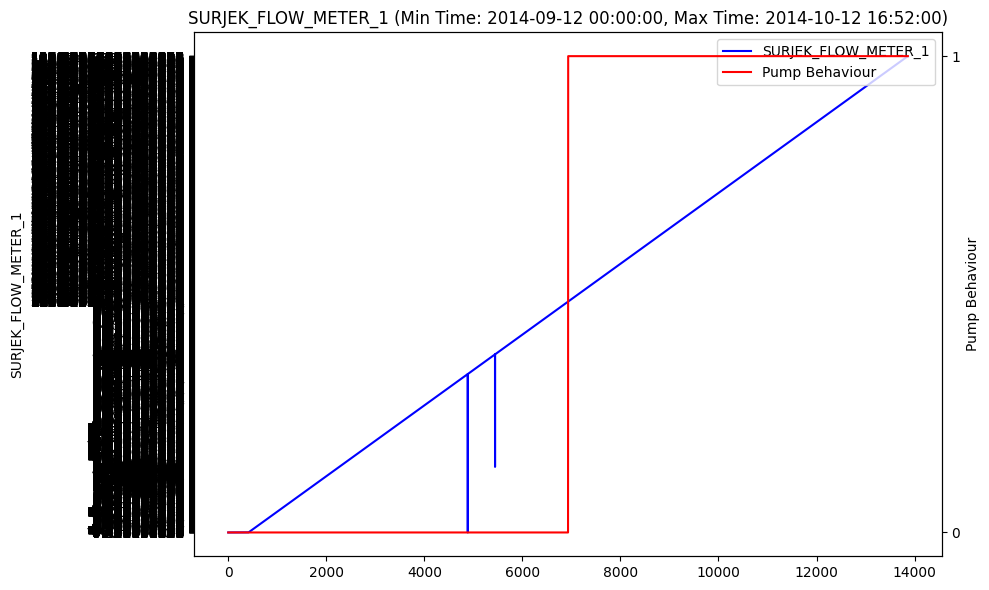

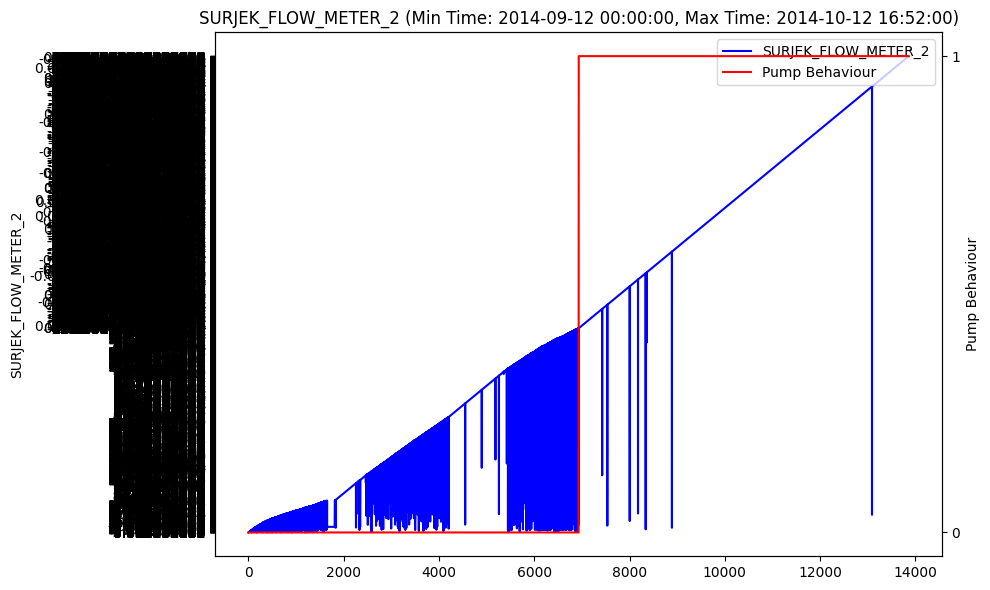

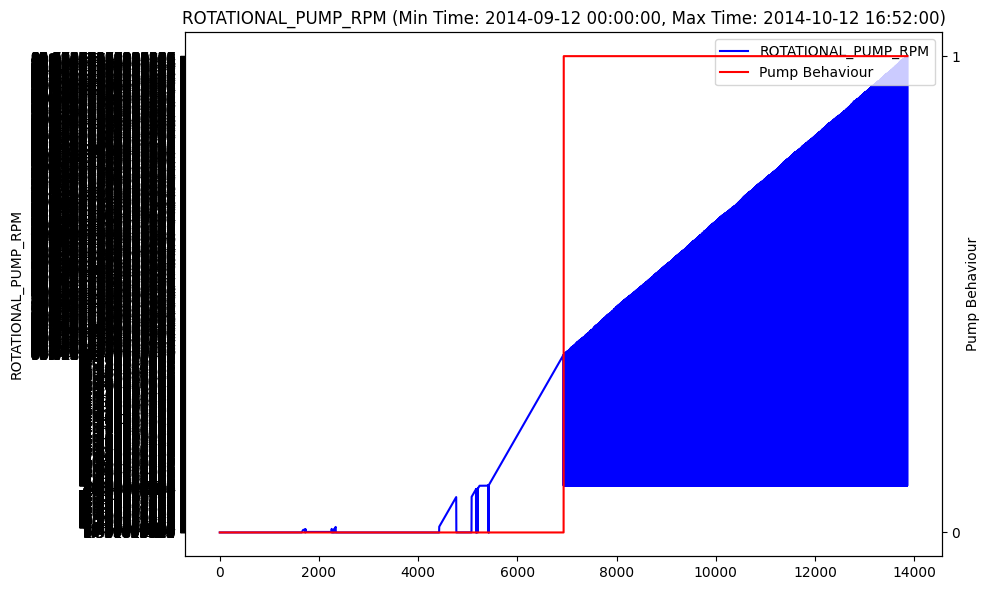

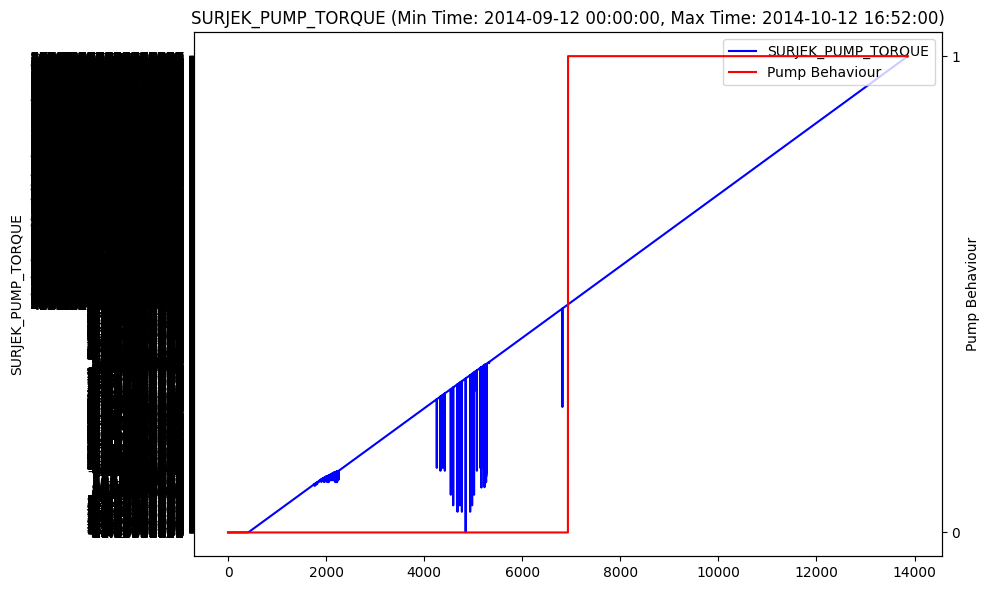

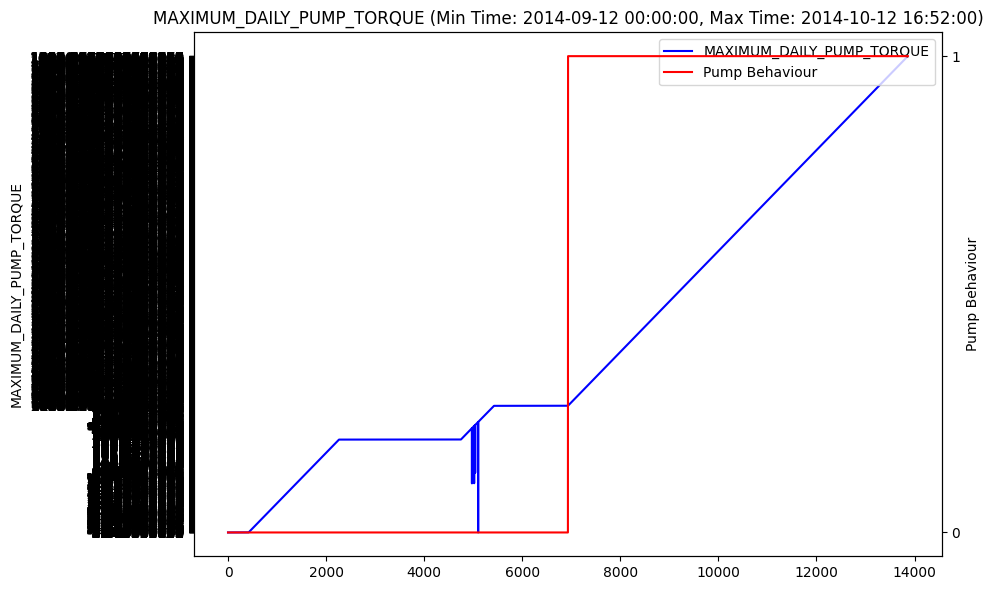

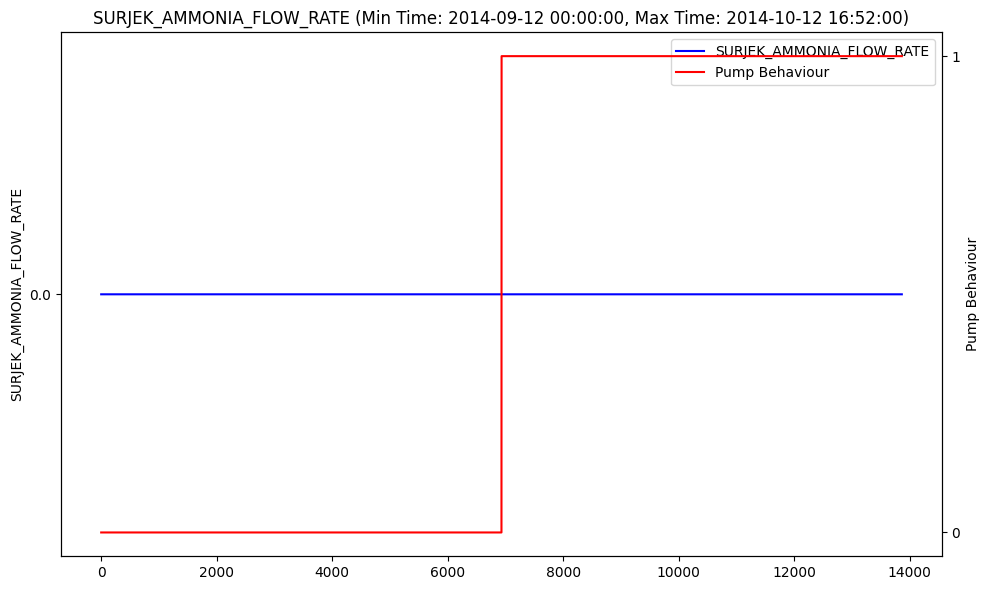

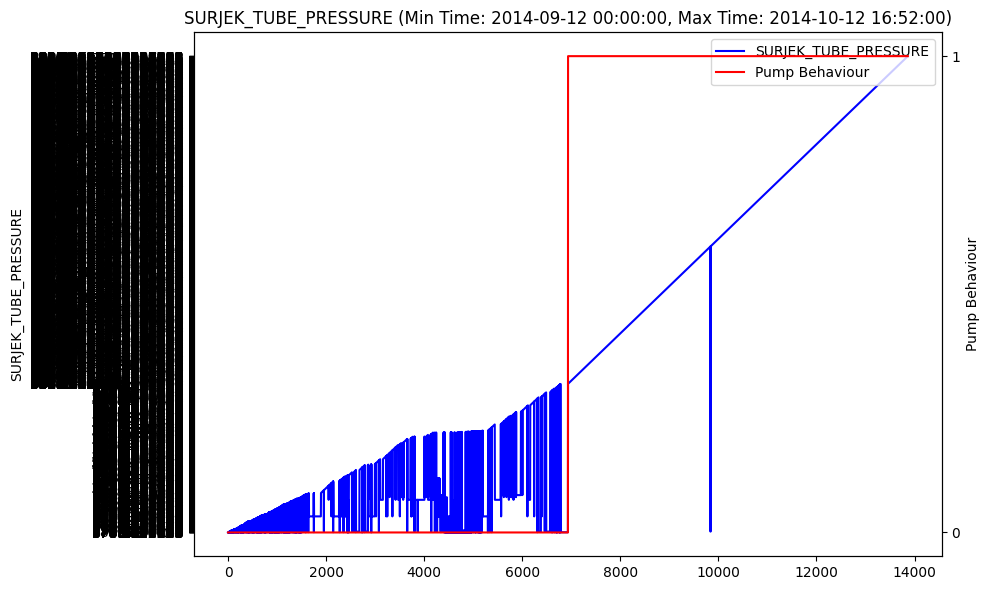

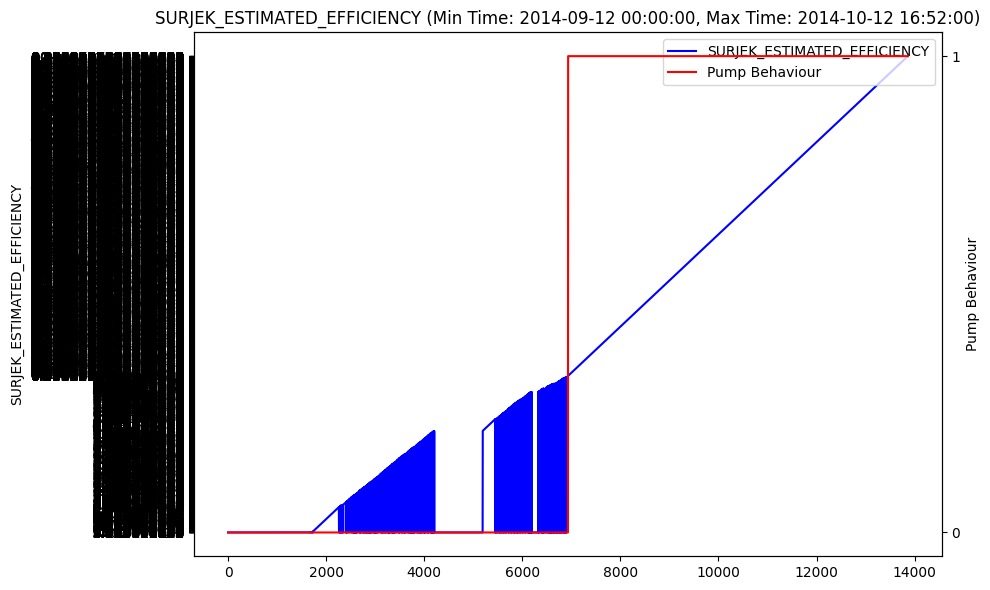

In [ ]:
#Below is the first part of the code
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
filt2 = ['PUMP FAILURE (1 or 0)']
colList = df[filt].columns
figure_size = (10, 6)

#---write your code below-------
min_time = df2['TIMEFRAME'].min()
max_time =  df2['TIMEFRAME'].max()
# Iterate through each column
df2 = df2.astype(str)
for column in colList:
    # Create a new figure and set up the dual axes
    fig, ax1 = plt.subplots(figsize=figure_size)
    ax2 = ax1.twinx()

    # Plot the attribute data on the first y-axis
    ax1.plot(df2[column], color='blue', label=column)
    ax1.set_ylabel(column)

    # Plot the Pump Behaviour (0 or 1) on the second y-axis
    ax2.plot( df2['PUMP FAILURE (1 or 0)'], color='red', label='Pump Behaviour')
    ax2.set_ylabel('Pump Behaviour')

    # Set the title with min and max time
    plt.title(f'{column} (Min Time: {min_time}, Max Time: {max_time})')

    # Set up the legend
    lines = ax1.get_lines() + ax2.get_lines()
    ax1.legend(lines, [line.get_label() for line in lines], loc='upper right')

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [ ]:
df2['PUMP FAILURE (1 or 0)']

0        0
1        0
2        0
3        0
4        0
        ..
13859    1
13860    1
13861    1
13862    1
13863    1
Name: PUMP FAILURE (1 or 0), Length: 13864, dtype: object


Of course, given that all the attributes have varying units, you might need more than one plot to make sense of all this data. For this next step, let's view the information by comparing the <b>ROLILNG DEVIATIONS</b> over a 30-point period.

As the deviations will likely be a lot lower, the scale should be much simpler to view on one plot.
Make sure that you include the 'PUMP FAILURE 1 or 0' attribute on the secondary Y-axis.

#### Hint: Remember to make use of the Dual-Axis plot trick you learned in the previous exercise!


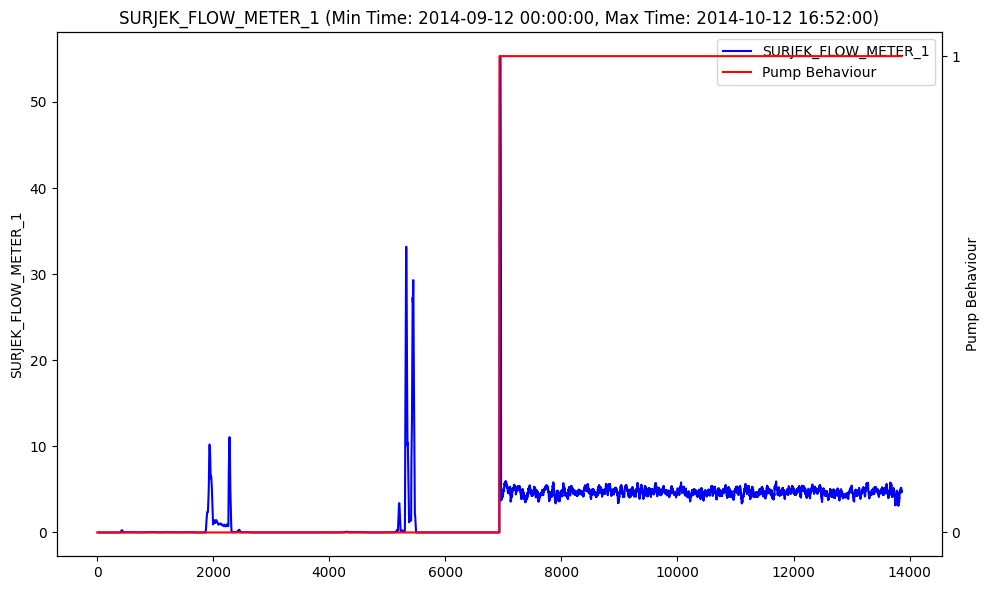

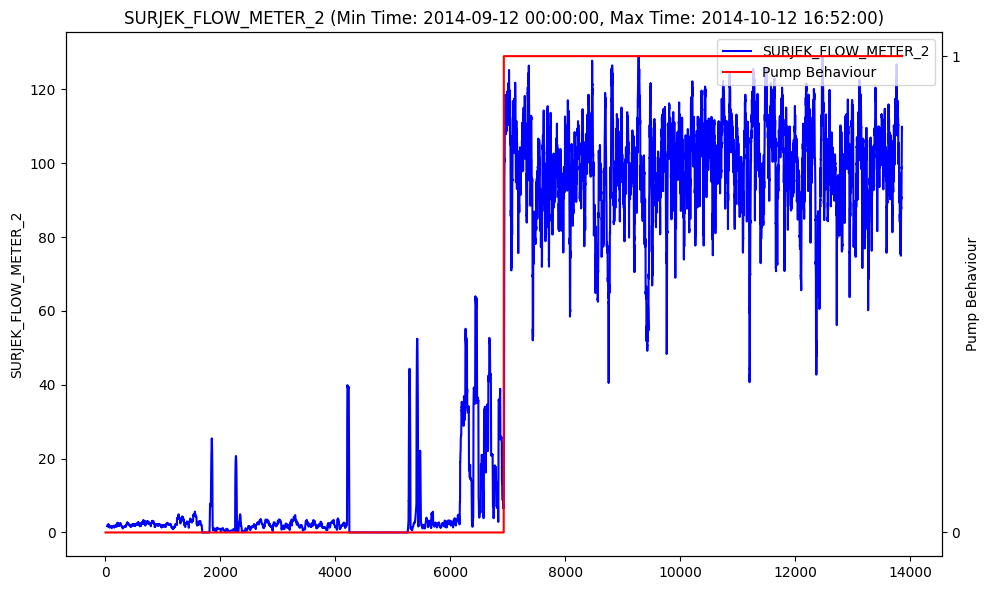

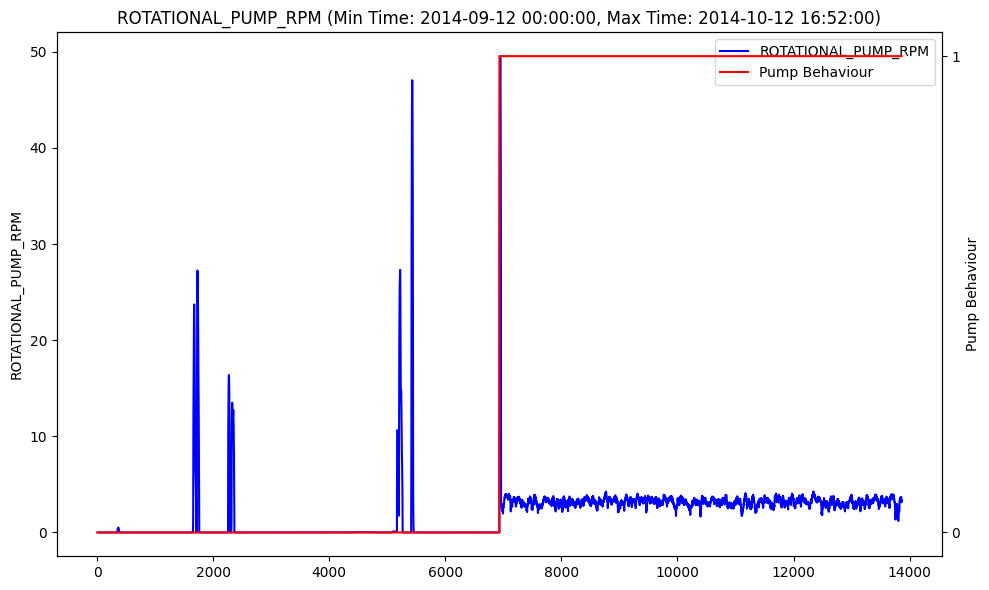

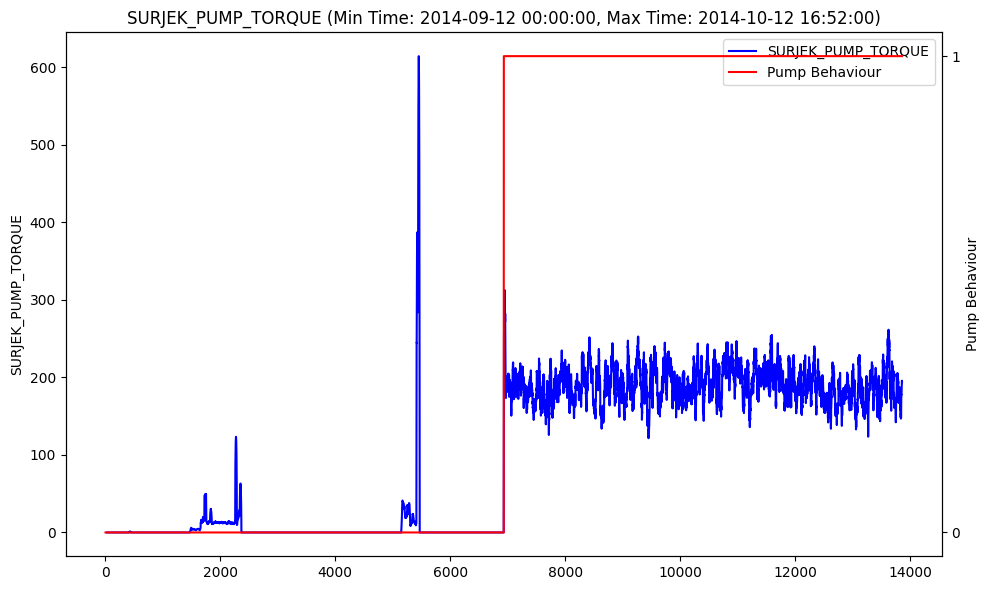

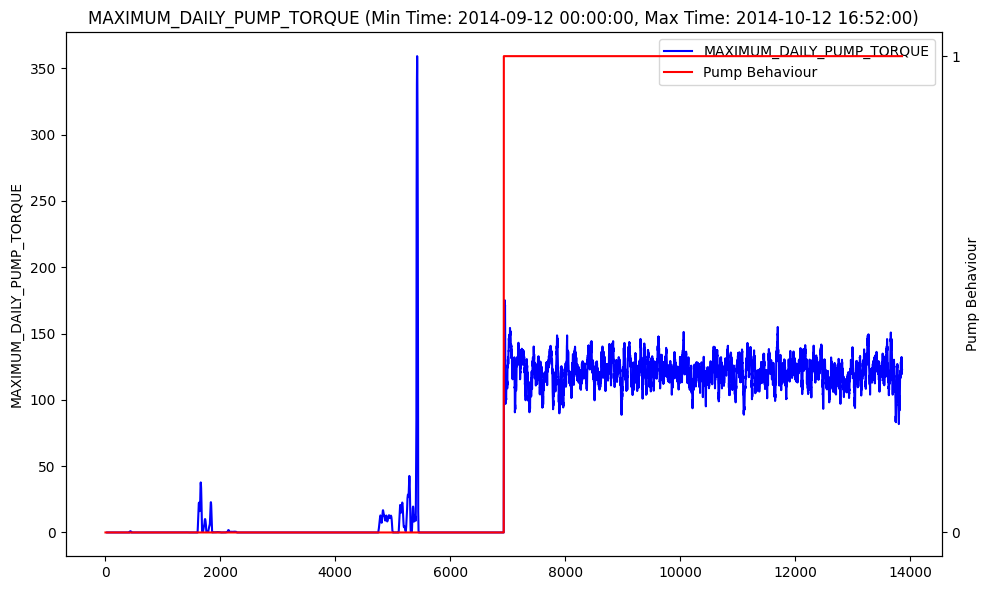

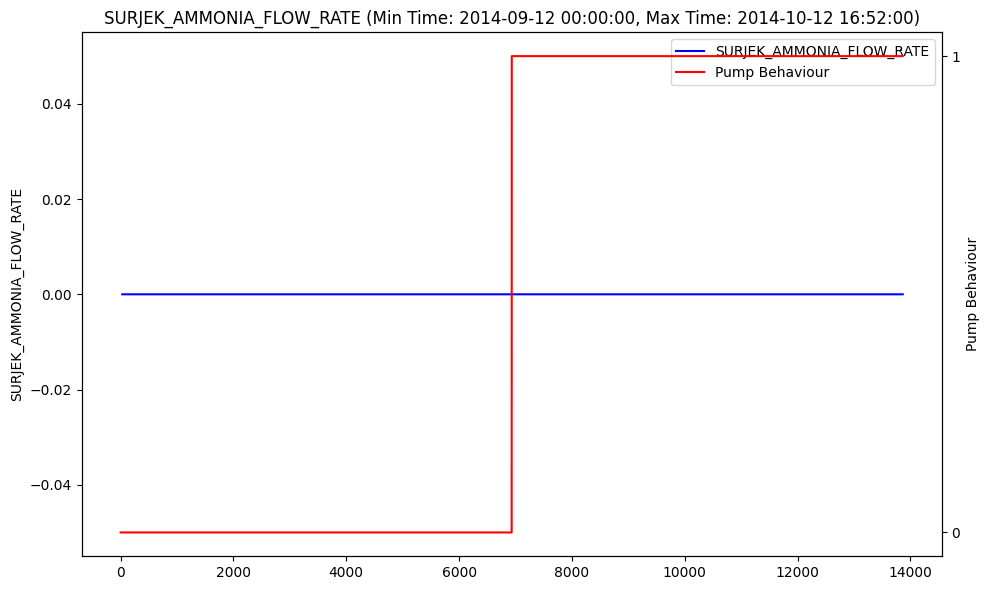

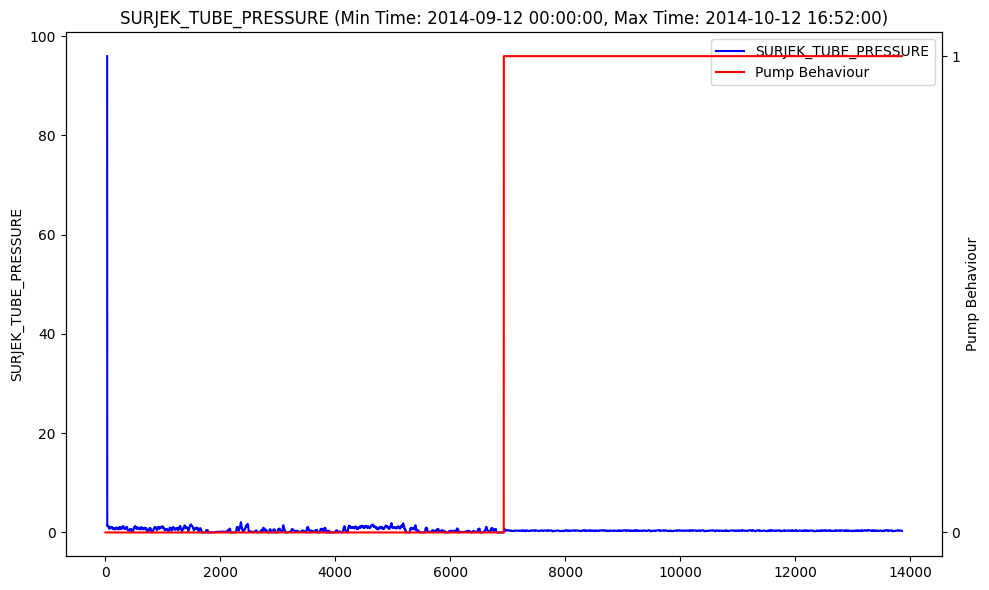

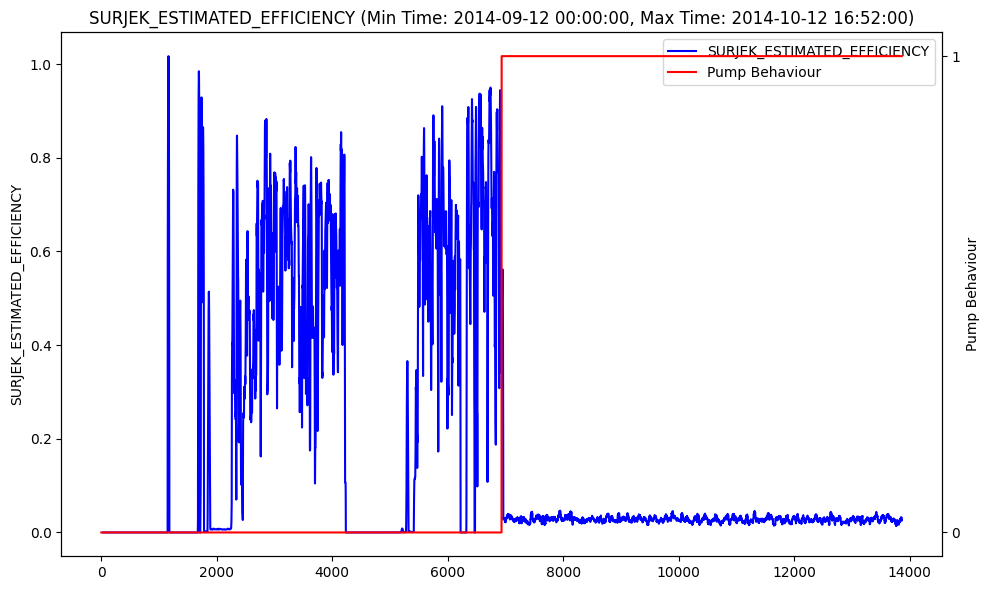

In [ ]:
import matplotlib.dates as mdates
#Below is the first part of the code
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
filt2 = ['PUMP FAILURE (1 or 0)']
colList = df[filt].columns
figure_size = (10, 6)

#---write your code below-------
min_time = df2['TIMEFRAME'].min()
max_time =  df2['TIMEFRAME'].max()
# Iterate through each column
df2 = df2.astype(str)
for column in colList:
    # Create a new figure and set up the dual axes
    fig, ax1 = plt.subplots(figsize=figure_size)
    ax2 = ax1.twinx()
    rolling_deviations = df2[column].rolling(window=30).std()
    # Plot the attribute data on the first y-axis
    ax1.plot(rolling_deviations, color='blue', label=column)
    ax1.set_ylabel(column)

    # Plot the Pump Behaviour (0 or 1) on the second y-axis
    ax2.plot( df2['PUMP FAILURE (1 or 0)'], color='red', label='Pump Behaviour')
    ax2.set_ylabel('Pump Behaviour')

    # Set the title with min and max time
    plt.title(f'{column} (Min Time: {min_time}, Max Time: {max_time})')

    # Set up the legend
    lines = ax1.get_lines() + ax2.get_lines()
    ax1.legend(lines, [line.get_label() for line in lines], loc='upper right')

    # Adjust the layout
    plt.tight_layout()

    # Show the plot

---

### Step 10: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span>

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.


ii) Re-plot all variables for the time period 10/12/2014 14:40 to 10/12/2014 14:45, focusing specifically on the first Pump “Failure”.


**Open-ended Question:**
Do any particular variables seem to move in relation to the failure event?

## Please put your code here

In [ ]:
time_list=['2014-10-12 14:41:00','2014-10-12 14:42:00','2014-10-12 14:43:00','2014-10-12 14:44:00','2014-10-12 14:45:00']

In [ ]:
df2.head()

,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,minute,Year,Month,Day,Hour,PUMP FAILURE (1 or 0),TIMEFRAME
0,0.0,-4.768066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:00:00
1,0.0,-4.855957,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:01:00
2,0.0,-7.447938449,0.0,0.0,0.0,0.0,378.1128,0.0,1.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:01:00
3,0.0,-8.745117,0.0,0.0,0.0,0.0,379.0283,0.0,1.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:01:00
4,0.0,-6.877441,0.0,0.0,0.0,0.0,378.9599188,0.0,2.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:02:00


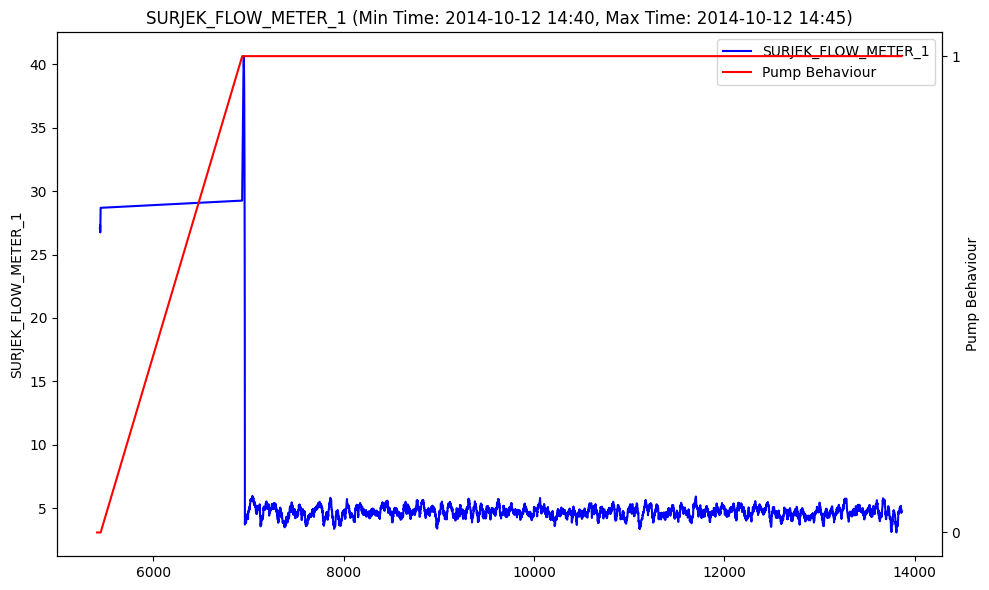

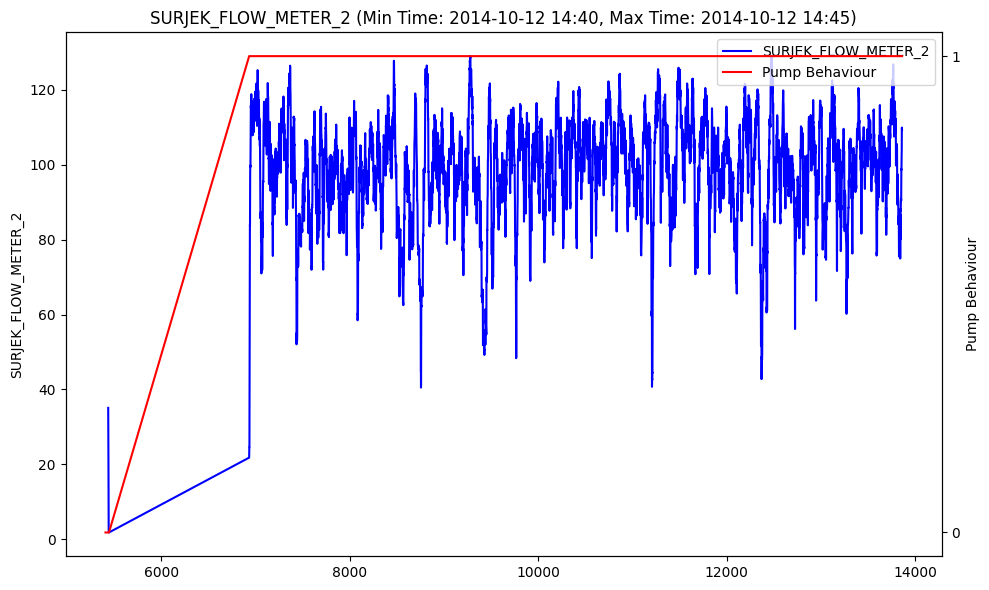

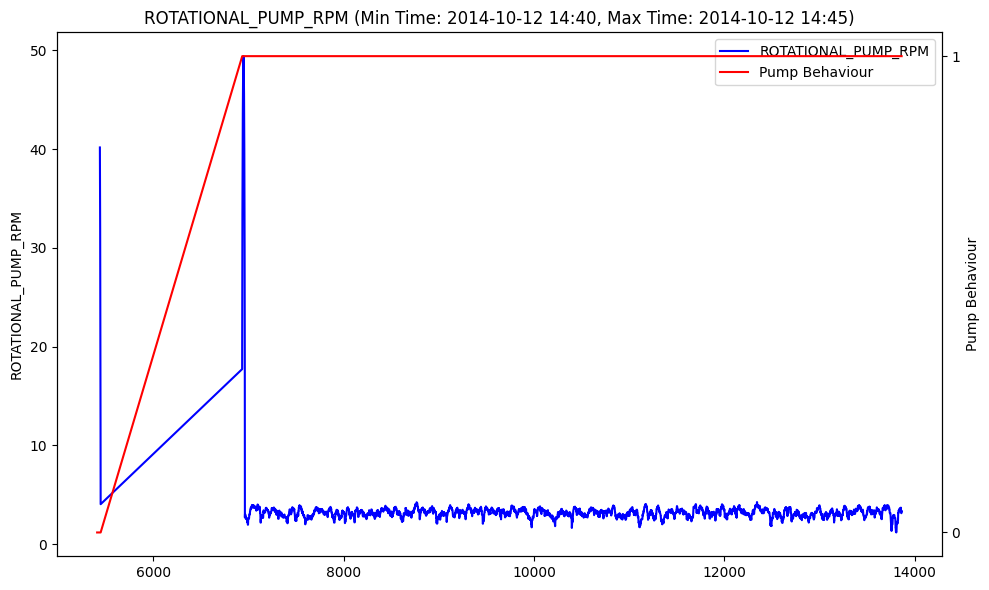

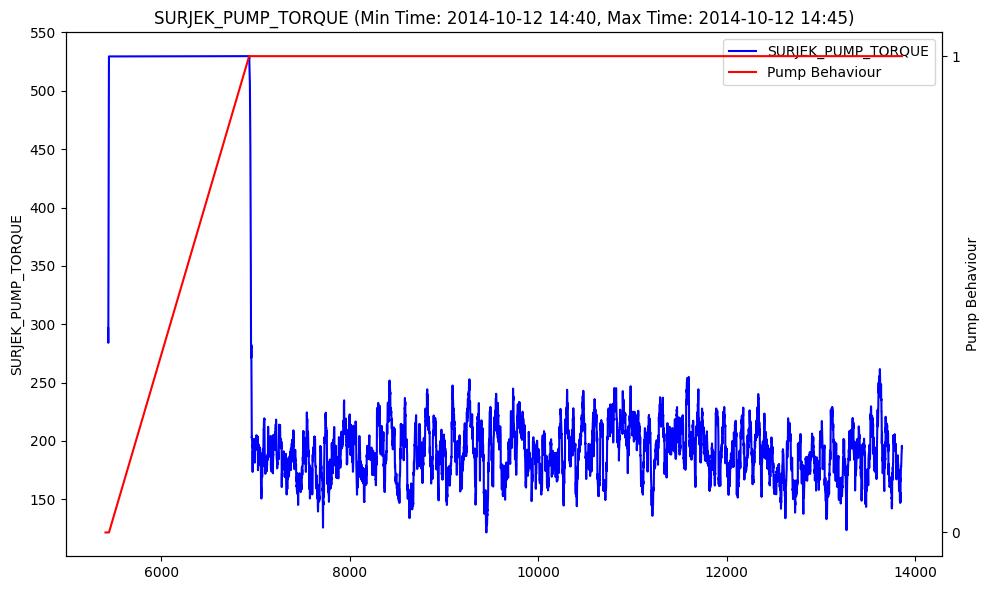

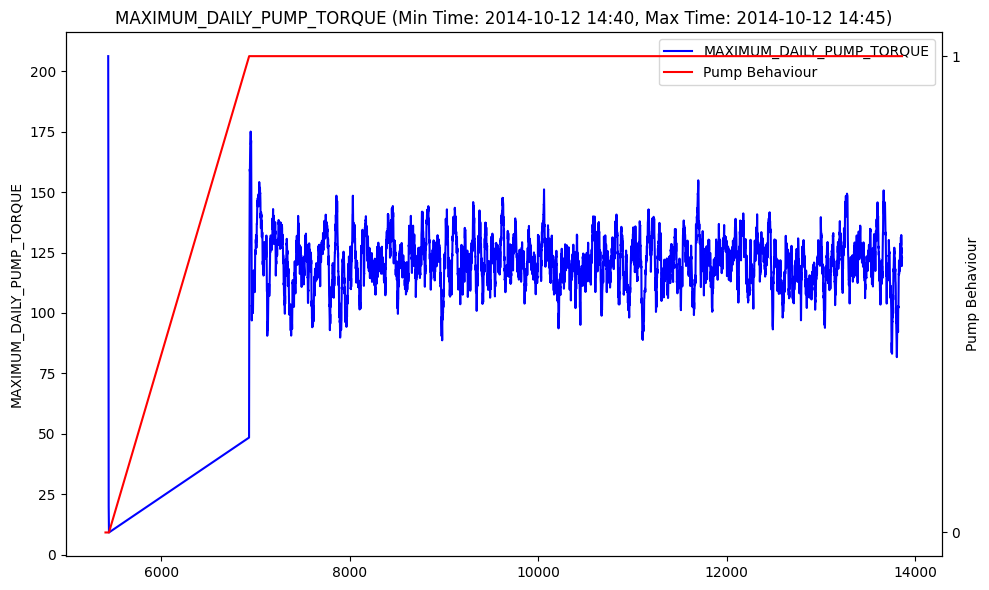

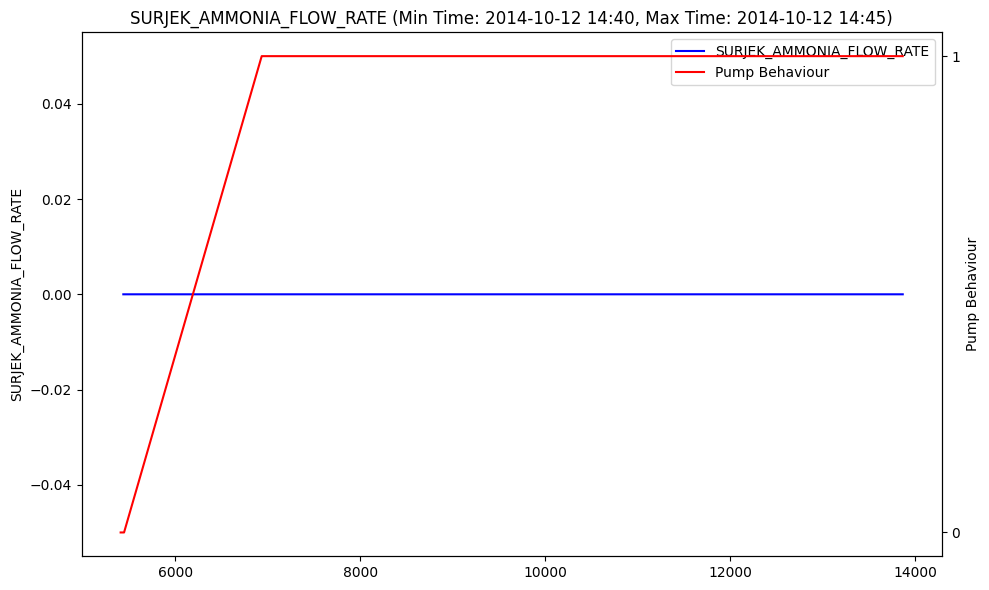

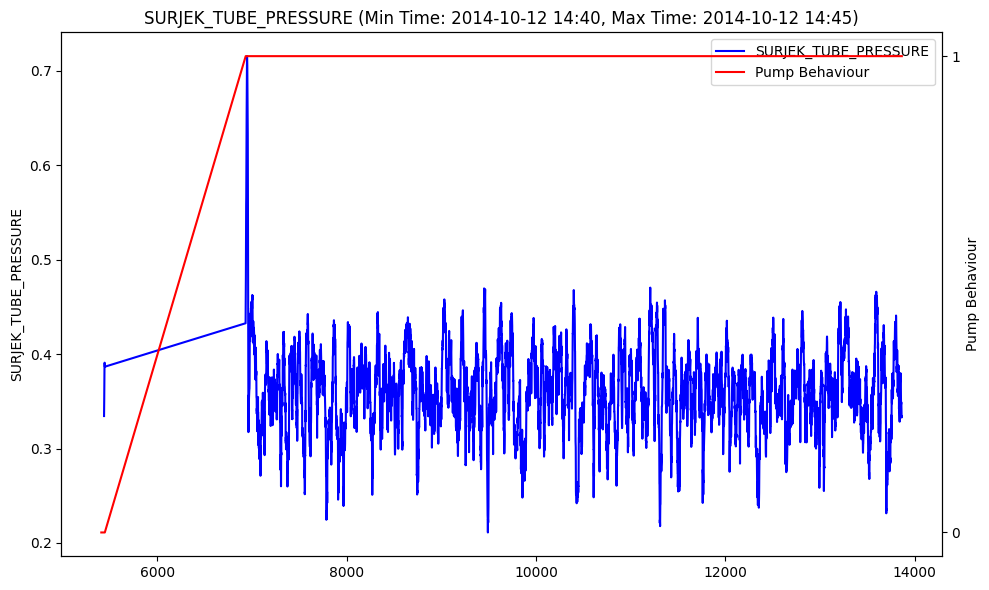

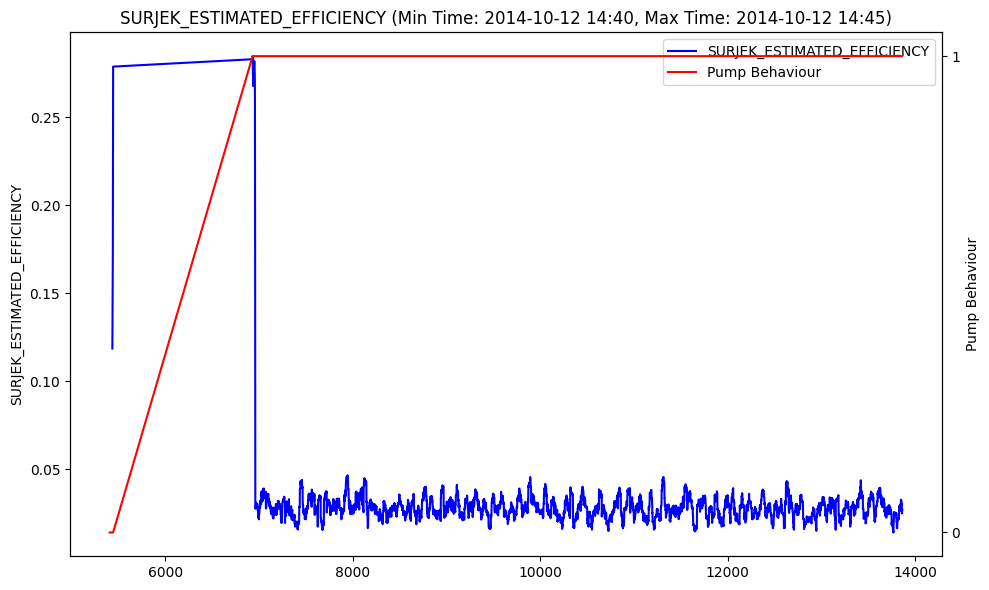

In [ ]:
import matplotlib.dates as mdates
#Below is the first part of the code
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
filt2 = ['PUMP FAILURE (1 or 0)']
colList = df[filt].columns
figure_size = (10, 6)
start_date = '2014-10-12 14:40'
end_date = '2014-10-12 14:45'
df_subset = df2[(df2['TIMEFRAME'] >= start_date) & (df2['TIMEFRAME'] <= end_date)]


#---write your code below-------

# Iterate through each column
df_subset = df_subset.astype(str)
for column in colList:
    fig, ax1 = plt.subplots(figsize=figure_size)
    ax2 = ax1.twinx()
    rolling_deviations = df_subset[column].rolling(window=30).std()
    # Plot the attribute data on the first y-axis
    ax1.plot(rolling_deviations, color='blue', label=column)
    ax1.set_ylabel(column)

    # Plot the Pump Behaviour (0 or 1) on the second y-axis
    ax2.plot(df_subset['PUMP FAILURE (1 or 0)'], color='red', label='Pump Behaviour')
    ax2.set_ylabel('Pump Behaviour')

    # Set the title with min and max time
    plt.title(f'{column} (Min Time: {start_date}, Max Time: {end_date})')

    # Set up the legend
    lines = ax1.get_lines() + ax2.get_lines()
    ax1.legend(lines, [line.get_label() for line in lines], loc='upper right')

    # Adjust the layout
    plt.tight_layout()


---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

When you performed inferential statistics for Southern Water Corp using Excel, you made use of the data analysis package to create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure.

Now, you'll create a heatmap using Seaborn's heatmap function — another testament to the fact that having Matplotlib and Seaborn in your toolbox will allow you to quickly create beautiful graphics that provide key insights.

### Step 11: <span style="color:purple">Create a Heatmap</span>
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R Squared) for all variables (excluding those with consistent 0 values such as Ammonia Flow Rate).

**Note:** We have provided the filter list and created the dataframe for you.

Link: (https://seaborn.pydata.org/generated/seaborn.heatmap.html)

## Please put your code here

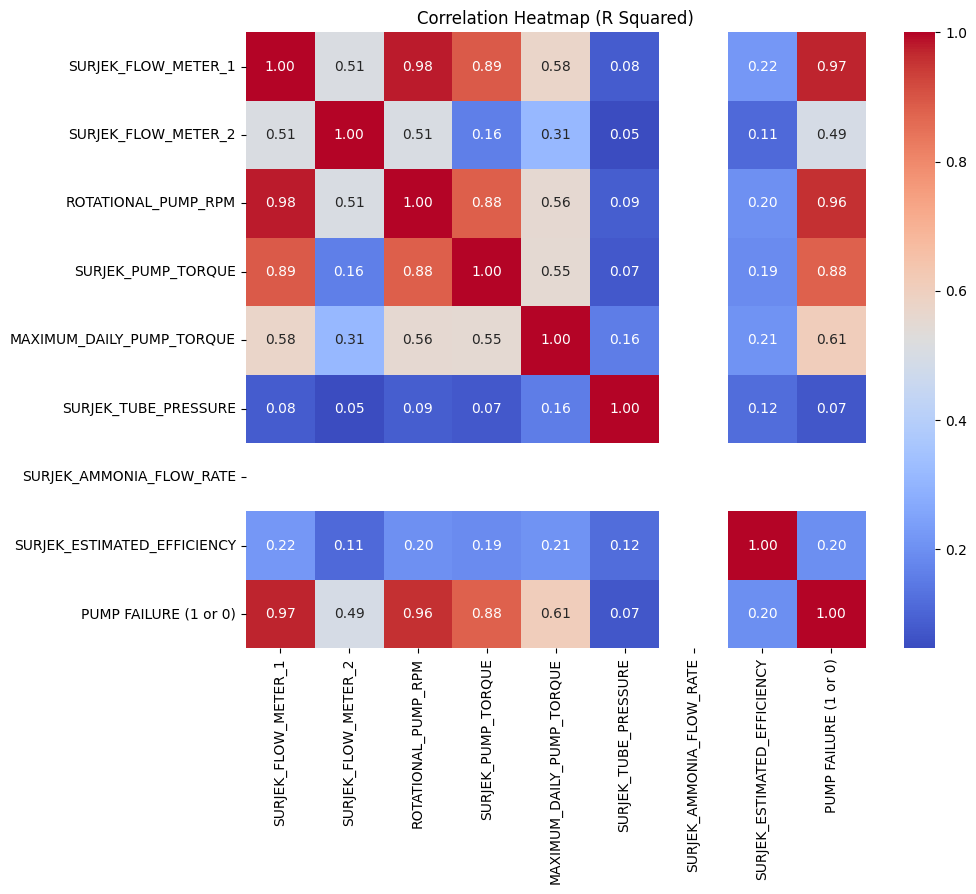

In [ ]:
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_TUBE_PRESSURE','SURJEK_AMMONIA_FLOW_RATE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)']
df2[filt] = df2[filt].apply(pd.to_numeric, errors='coerce')
#----write your code below--------
# plt.figure(figsize=(20, 10))
# sns.heatmap(df4,cmap="crest")
# plt.show()
correlation_matrix = df2[filt].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (R Squared)")
plt.show()



**Open-ended Question:**

Which variables seem to correlate with Pump Failure?
answer :SURJEK_FLOW_METER_1,ROTATIONAL_PUMP_RPM,MAXIMUM_DAILY_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE

### Step 12: <span style="color:purple">Create a Barplot of Correlated Features</span>
Create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order.

<ipython-input-47-9d3edb4ecfff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df2.corr()['PUMP FAILURE (1 or 0)']


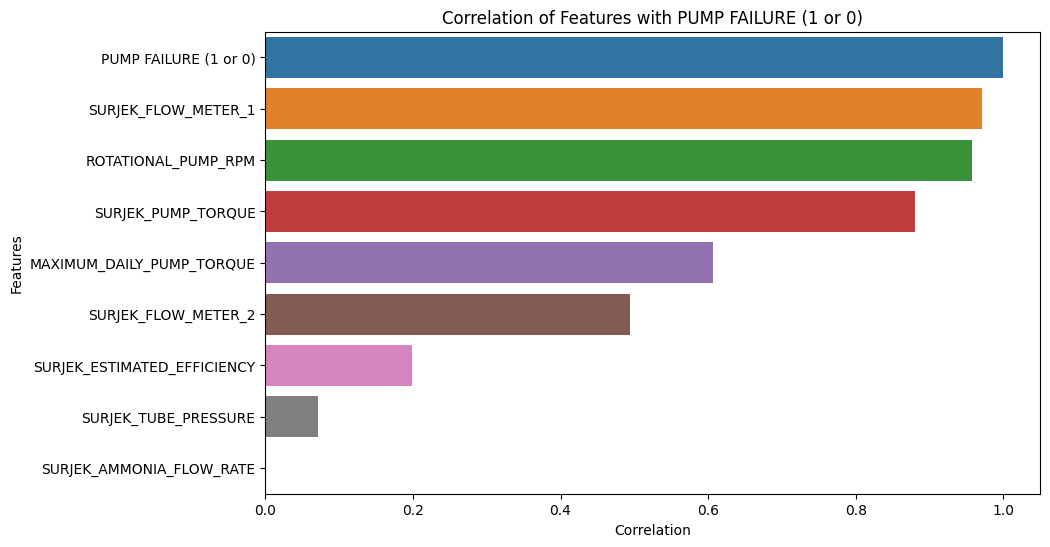

In [ ]:
# Calculate the correlation between each feature and PUMP FAILURE (1 or 0)
correlation = df2.corr()['PUMP FAILURE (1 or 0)']

# Sort the correlation values in descending order
correlation_sorted = correlation.abs().sort_values(ascending=False)

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, orient='h')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlation of Features with PUMP FAILURE (1 or 0)')
plt.show()


---

### Step 13: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span>
Previously, you created a correlation matrix using 'raw' variables. This time, you'll transform 'raw' variables using a rolling standard deviation.

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.

ii) Using the newly created rolling standard deviation dataframe, use the Seaborn heatmap function to replot this dataframe into a heatmap.

Do any variables stand out? If yes, list these out below your heatmap.
**yes,	SURJEK_FLOW_METER_1**


**Note:** We have provided the initial dataframe and filters.

## Please put your code here

In [ ]:
df2.head()

,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,minute,Year,Month,Day,Hour,PUMP FAILURE (1 or 0),TIMEFRAME
0,0.0,-4.768066,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:00:00
1,0.0,-4.855957,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:01:00
2,0.0,-7.447938,0.0,0.0,0.0,0.0,378.112800,0.0,1.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:01:00
3,0.0,-8.745117,0.0,0.0,0.0,0.0,379.028300,0.0,1.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:01:00
4,0.0,-6.877441,0.0,0.0,0.0,0.0,378.959919,0.0,2.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:02:00


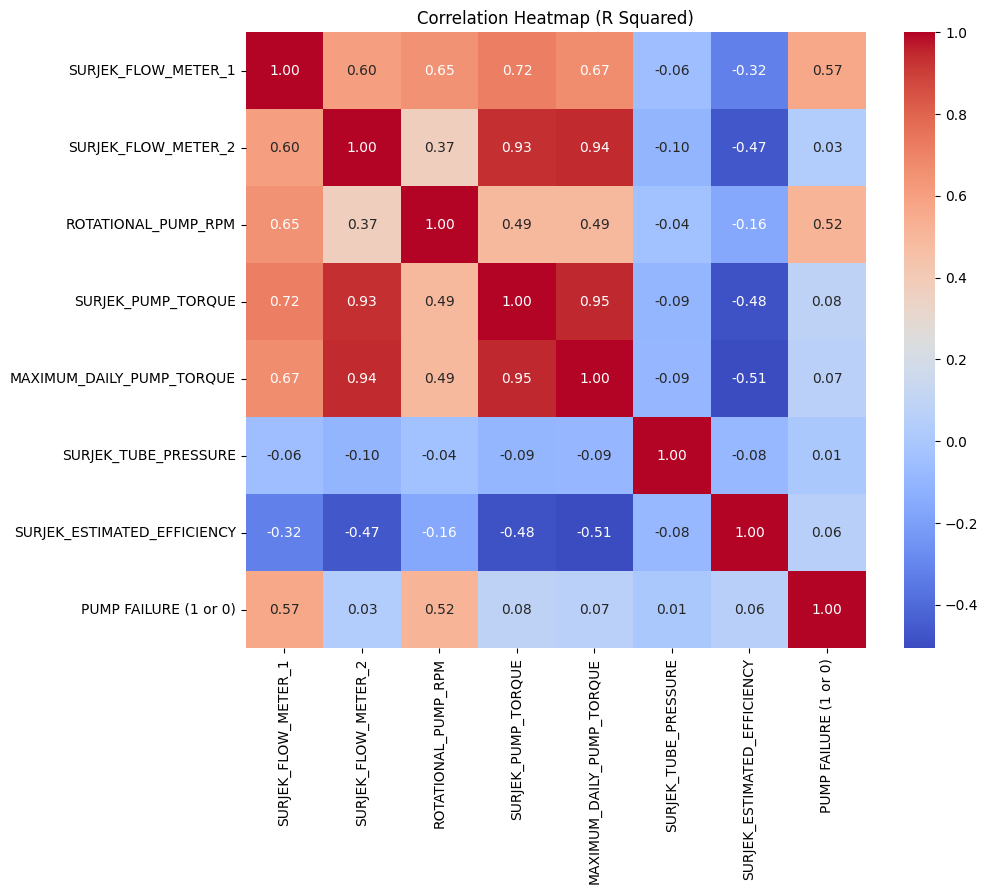

In [ ]:
#Below is the first part of the code
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)']
#----write your code below------
rolling_std = df2[filt].rolling(window=30).std()

# Create a heatmap using the rolling standard deviation dataframe
correlation_matrix = rolling_std.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (R Squared)")
plt.show()



In [ ]:
df3=df2
y = df3['PUMP FAILURE (1 or 0)']
x= df3.drop(columns=['PUMP FAILURE (1 or 0)','TIMEFRAME','SURJEK_TUBE_PRESSURE','SURJEK_ESTIMATED_EFFICIENCY','Year','Day'])
x = x.apply(pd.to_numeric, errors='coerce')


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (11091, 9)
X_test shape: (2773, 9)
y_train shape: (11091,)
y_test shape: (2773,)


### Creating a Multivariate Regression Model


In [ ]:
import statsmodels.api as sm

# Add constant term to independent variables
X = sm.add_constant(X_train)

# Fit OLS model
model = sm.OLS(y_train, X).fit()

# Get model summary
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.950
Model:                               OLS   Adj. R-squared:                  0.950
Method:                    Least Squares   F-statistic:                 2.643e+04
Date:                   Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                           11:09:52   Log-Likelihood:                 8584.9
No. Observations:                  11091   AIC:                        -1.715e+04
Df Residuals:                      11082   BIC:                        -1.709e+04
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

When you worked on this case study in Excel, you went through the tricky process of using the rolling standard deviation variables to generate a regression equation. Happily, this process is much simpler in Python.

For this step, you'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 14: <span style="color:purple">Use OLS Regression</span>
i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables, which include every other variable that is not PUMP FAILURE (1 or 0). What is the R Squared for the model and what does this signify?

ii) Repeat i) but this time use the rolling standard deviation variables you created previously. What is the R Squared for the model and what does this signify?

**Open-ended Question:**

Which linear regression model seems to be a better fit? **the fist one **

**Note:** We have provided the initial dataframe and filter list.

## Please put your code here

In [ ]:
y2 = df3['PUMP FAILURE (1 or 0)']
x2= df3.drop(columns=['SURJEK_FLOW_METER_1','PUMP FAILURE (1 or 0)','TIMEFRAME','SURJEK_TUBE_PRESSURE','SURJEK_ESTIMATED_EFFICIENCY','Year','Day'])
x2 = x2.apply(pd.to_numeric, errors='coerce')
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train2.shape)
print("X_test shape:", X_test2.shape)
print("y_train shape:", y_train2.shape)
print("y_test shape:", y_test2.shape)




X_train shape: (11091, 8)
X_test shape: (2773, 8)
y_train shape: (11091,)
y_test shape: (2773,)


In [ ]:
# Add constant term to independent variables
X = sm.add_constant(X_train2)

# Fit OLS model
model2 = sm.OLS(y_train2, X).fit()

# Get model summary
print(model2.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.936
Model:                               OLS   Adj. R-squared:                  0.936
Method:                    Least Squares   F-statistic:                 2.304e+04
Date:                   Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                           11:09:52   Log-Likelihood:                 7168.4
No. Observations:                  11091   AIC:                        -1.432e+04
Df Residuals:                      11083   BIC:                        -1.426e+04
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

Great job creating those regressive equations! You've reached the final step of this case study!
### Step 15: <span style="color:purple">Validate Predictions</span>
i) Use the regression equation you created in the previous step and apply the .predict() function to the dataframe to see whether or not your model 'picks' up the Pump Failure Event.

ii) Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'

**Note:** Please ensure all axes are clearly labelled and ensure that you use Dual Axes to plot this. Make the line widths wider than 1 so the plots are easier to see. We have provided the initial figure size.

## Please put your code here

In [ ]:
y_pred = model.predict(sm.add_constant(X_test))
y_pred2= model2.predict(sm.add_constant(X_test2))
print(round(y_pred))
print(y_test)

7814     1.0
1880     0.0
7438     1.0
4889    -0.0
3194    -0.0
        ... 
11033    1.0
7798     1.0
1878     0.0
13403    1.0
13214    1.0
Length: 2773, dtype: float64
7814     1
1880     0
7438     1
4889     0
3194     0
        ..
11033    1
7798     1
1878     0
13403    1
13214    1
Name: PUMP FAILURE (1 or 0), Length: 2773, dtype: int64


In [ ]:
X_test2.iloc[1,:]

SURJEK_FLOW_METER_2           50.837686
ROTATIONAL_PUMP_RPM           33.000000
SURJEK_PUMP_TORQUE           237.793300
MAXIMUM_DAILY_PUMP_TORQUE    270.528540
SURJEK_AMMONIA_FLOW_RATE       0.000000
minute                        35.000000
Month                          9.000000
Hour                          10.000000
Name: 1880, dtype: float64

In [ ]:
X_test.iloc[0,:].values.reshape(-1)

array([ 104.624667  ,  112.94488891,   92.54034673,  490.07468033,
       1087.75236378,    0.        ,   41.        ,   10.        ,
         14.        ])

In [ ]:
 X_test.iloc[0, :].values.reshape(9,)

array([ 104.624667  ,  112.94488891,   92.54034673,  490.07468033,
       1087.75236378,    0.        ,   41.        ,   10.        ,
         14.        ])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, round(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, round(y_pred)))
r2 = r2_score(y_test, y_pred)
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
r22= r2_score(y_test2, y_pred2)
print('mse=',mse)
print('rmse=',rmse)
print('r2=',r2)
print('mse2=',mse)
print('rmse2=',rmse)
print('r22=',r2)

mse= 0.009376126938333935
rmse= 0.0968304029648433
r2= 0.9478201242539162
mse2= 0.009376126938333935
rmse2= 0.0968304029648433
r22= 0.9478201242539162


##Accuracy:

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have your true labels in y_test and predicted labels in y_pred

# Calculate the accuracy
accuracy = accuracy_score(y_test, round(y_pred))

print("Accuracy:", accuracy)

Accuracy: 0.9906238730616661


##Confusion Matrix:

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have your true labels in y_test and predicted labels in y_pred

# Generate the confusion matrix
cm = confusion_matrix(y_test, round(y_pred))

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1370   26]
 [   0 1377]]


In [ ]:
y_pred

7814     0.940640
1880     0.106538
7438     0.997944
4889    -0.078217
3194    -0.053384
           ...   
11033    0.994664
7798     0.989733
1878     0.105567
13403    0.981095
13214    0.990924
Length: 2773, dtype: float64

In [ ]:
# y2=y_pred>=0.5
# y2.reset_index(drop=True)
# y2.index=range(len(y2))
# y2

# for i in range(len(y2)):
#   if y2[i]==True:
#     y2[i]=1
#   else :
#     y2[i]=0

In [ ]:
y_test==round(y_pred)

7814     True
1880     True
7438     True
4889     True
3194     True
         ... 
11033    True
7798     True
1878     True
13403    True
13214    True
Length: 2773, dtype: bool

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))

# # Plot the actual 'PUMP FAILURE (1 or 0)'
# sns.lineplot(x=df3.index[:len(y_test)], y=y_test, color='blue', label='Actual')

# # Plot the predicted values from the rolling linear regression equation
# sns.lineplot(x=df3.index[:len(y2)], y=round(y_pred), color='red', label='Predicted')

# plt.xlabel('Index')
# plt.ylabel('PUMP FAILURE (1 or 0)')
# plt.title('Rolling Linear Regression')
# plt.legend()
# plt.show()


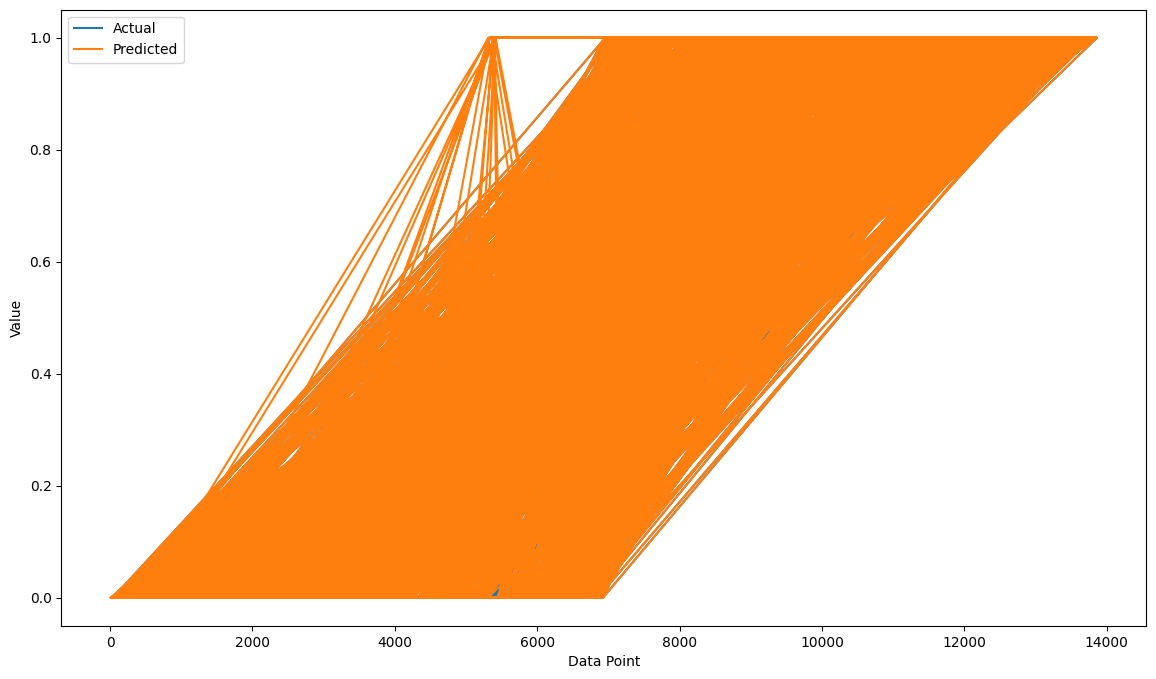

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(y_test, label='Actual')
plt.plot(round(y_pred), label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

plt.show()
plt.tight_layout()




In [ ]:
X_train.columns

Index(['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'minute', 'Month', 'Hour'],
      dtype='object')

In [ ]:
df2

,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,minute,Year,Month,Day,Hour,PUMP FAILURE (1 or 0),TIMEFRAME
0,0.000000,-4.768066,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:00:00
1,0.000000,-4.855957,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:01:00
2,0.000000,-7.447938,0.000000,0.000000,0.000000,0.0,378.112800,0.000000,1.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:01:00
3,0.000000,-8.745117,0.000000,0.000000,0.000000,0.0,379.028300,0.000000,1.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:01:00
4,0.000000,-6.877441,0.000000,0.000000,0.000000,0.0,378.959919,0.000000,2.0,2014.0,9.0,12.0,0.0,0,2014-09-12 00:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13859,106.820276,18.077955,95.405702,690.889959,1032.197011,0.0,381.036055,0.858501,41.0,2014.0,10.0,12.0,14.0,1,2014-10-12 14:41:00
13860,111.885228,13.620259,99.000000,713.658006,898.026675,0.0,381.315502,0.863942,40.18321157795681,2014.0,10.0,12.0,14.0,1,2014-10-12 14:40:00
13861,102.378791,295.183237,90.068720,376.805986,1141.430754,0.0,381.384455,0.839617,41.0,2014.0,10.0,12.0,14.0,1,2014-10-12 14:41:00
13862,104.864085,79.379217,92.778574,675.201863,1083.136635,0.0,381.207555,0.804828,41.0,2014.0,10.0,12.0,14.0,1,2014-10-12 14:41:00


In [ ]:
df4=df2
y4 = df4['PUMP FAILURE (1 or 0)']
x4= df4.drop(columns=['PUMP FAILURE (1 or 0)','TIMEFRAME','SURJEK_TUBE_PRESSURE','SURJEK_ESTIMATED_EFFICIENCY','Year','Day'])
x4 = x4.apply(pd.to_numeric, errors='coerce')


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x4)
x_scaled

array([[-1.06264484, -0.60399353, -1.07928296, ..., -2.67371596,
        -1.41406057, -3.20830745],
       [-1.06264484, -0.60505102, -1.07928296, ..., -2.59850027,
        -1.41406057, -3.20830745],
       [-1.06264484, -0.63623733, -1.07928296, ..., -2.59850027,
        -1.41406057, -3.20830745],
       ...,
       [ 0.83068616,  3.0049737 ,  0.81876022, ...,  0.41012718,
         0.70718329,  0.41556877],
       [ 0.87664767,  0.40845344,  0.87586571, ...,  0.41012718,
         0.70718329,  0.41556877],
       [ 0.89442419, -0.15477125,  0.90107042, ...,  0.41012718,
         0.70718329,  0.41556877]])

In [ ]:
x4= df4.drop(columns=['SURJEK_FLOW_METER_1','PUMP FAILURE (1 or 0)','TIMEFRAME','SURJEK_TUBE_PRESSURE','SURJEK_ESTIMATED_EFFICIENCY','Year','Day'])
x4 = x4.apply(pd.to_numeric, errors='coerce')
X_train4, X_test4, y_train4, y_test2 = train_test_split(x4, y4, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train2.shape)
print("X_test shape:", X_test2.shape)
print("y_train shape:", y_train2.shape)
print("y_test shape:", y_test2.shape)


X_train shape: (11091, 8)
X_test shape: (2773, 8)
y_train shape: (11091,)
y_test shape: (2773,)


In [ ]:
# Create an instance of the logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train, y_train)

# Assuming you have your test data X_test and corresponding labels y_test

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.999278759466282


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


You've made it to the end of this challenging case study — well done! You've now converted all of the analysis you did for Southern Water Corp using Excel into Python. You created visualizations using Seaborn, manipulated datasets with pandas, and so much more! This case study was designed to give you practice using Python to analyze datasets both large and small — you can now apply these skills to work you do throughout your career as a data analyst.

## Great job! Being able to complete this case study means that you're now fluent in Python for data analysis! Congratulations!